<a href="https://colab.research.google.com/github/fgrumser/MPV_Exploratoria/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Felipe Grumser Franco Velho

**Matrícula:** 4052024002340

**Dataset:** [Air Quality UCI](https://raw.githubusercontent.com/fgrumser/MPV_Exploratoria/main/AirQualityUCI.csv
)

# Descrição do Problema

O objetivo deste trabalho é realizar uma análise exploratória de um conjunto de dados de qualidade do ar, medido por sensores e analisadores de referência. O conjunto de dados contém medições horárias de gases poluentes e variáveis meteorológicas, registradas entre março de 2004 e fevereiro de 2005. O dispositivo de medição estava localizado ao nível da rua, em uma área significativamente poluída dentro de uma cidade italiana. A análise busca entender o comportamento dessas variáveis ao longo do tempo e identificar possíveis relações entre condições atmosféricas e concentrações de poluentes. Após a definição do problema. O dataset passará, primeiramente, pela etapa de Análise de dados. Os processos a serem empregados têm como objetivo entender a informação disponível por meio de análises estatísticas apoiadas em recursos visuais. A etapa seguinte, denominada de Pré-processamento de dados, garante que os dados tenham mais consistência, passando por processos de limpeza e manipulação necessária ao tipo do problema.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

- Concentrações de poluentes atmosféricos variam com período do dia?

- A concentração de NO₂ (NO2(GT)) aumenta durante os horários de pico (manhã e final da tarde), sugerindo influência do tráfego urbano?

- Altos níveis de umidade relativa (RH) estão associados a menores concentrações de CO(GT), possivelmente devido à dispersão facilitada do gás em ambientes úmidos?

## Tipo de Problema

Este é um problema de análise exploratória de dados **não supervisionada**. Dado um conjunto de características medidas por sensores e analisadores de referência (como concentrações horárias de CO, NOx, NO₂, benzeno, além de variáveis meteorológicas como temperatura, umidade relativa e absoluta), o objetivo é identificar padrões, correlações e comportamentos relevantes que ajudem a entender a dinâmica da qualidade do ar em uma área urbana poluída ao longo do tempo.

## Seleção de Dados

O dataset Air Quality foi obtido do repositório UCI Machine Learning Repository, uma fonte amplamente reconhecida e utilizada para pesquisa em ciência de dados. Ele contém 9358 instâncias de respostas horárias médias de cinco sensores químicos de óxidos metálicos, embutidos em um dispositivo multisensor de qualidade do ar. Os dados foram coletados entre março de 2004 e fevereiro de 2005 em uma área significativamente poluída, ao nível da rua, em uma cidade italiana. As concentrações horárias reais de poluentes como CO, hidrocarbonetos não-metânicos, benzeno, NOx e NO₂ foram fornecidas por analisadores certificados co-localizados. Os valores ausentes estão representados por -200.

## Atributos do Dataset

O dataset Air Quality contém 9358 instâncias de medições horárias coletadas por sensores químicos e analisadores de referência, ao longo de um período de um ano. O conjunto possui 15 atributos, descritos a seguir:

| Nome do Atributo    | Tipo          | Unidade     | Descrição                                                                 |
|---------------------|---------------|-------------|---------------------------------------------------------------------------|
| **Date**            | Data          | —           | Data da medição (formato: dia/mês/ano).                                  |
| **Time**            | Categórico    | —           | Horário da medição (formato: hora:minuto:segundo).                       |
| **CO(GT)**          | Numérico      | mg/m³       | Concentração real de monóxido de carbono medida por analisador de referência. |
| **NMHC(GT)**        | Numérico      | µg/m³       | Concentração real de hidrocarbonetos não-metânicos.                      |
| **C6H6(GT)**        | Numérico      | µg/m³       | Concentração real de benzeno (composto tóxico e cancerígeno).           |
| **NOx(GT)**         | Numérico      | ppb         | Concentração real de óxidos de nitrogênio (NO + NO₂).                    |
| **NO2(GT)**         | Numérico      | µg/m³       | Concentração real de dióxido de nitrogênio.                              |
| **PT08.S1(CO)**     | Sensor        | —           | Resposta do sensor 1, sensível ao CO.                                    |
| **PT08.S2(NMHC)**   | Sensor        | —           | Resposta do sensor 2, sensível aos NMHC.                                 |
| **PT08.S3(NOx)**    | Sensor        | —           | Resposta do sensor 3, sensível aos óxidos de nitrogênio.                 |
| **PT08.S4(NO2)**    | Sensor        | —           | Resposta do sensor 4, sensível ao NO₂.                                   |
| **PT08.S5(O3)**     | Sensor        | —           | Resposta do sensor 5, sensível ao ozônio (O₃).                            |
| **T**               | Numérico      | °C          | Temperatura do ar.                                                       |
| **RH**              | Numérico      | %           | Umidade relativa do ar.                                                  |
| **AH**              | Numérico      | —           | Umidade absoluta do ar (quantidade real de vapor d’água).                |


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento do dataset a ser utilizado.

In [42]:
# Bibliotecas principais para análise de dados
import pandas as pd              # Manipulação de DataFrames
import numpy as np               # Operações numéricas e matrizes

# Bibliotecas de visualização
import matplotlib.pyplot as plt  # Criação de gráficos básicos
import seaborn as sns            # Visualizações estatísticas mais elaboradas

# Pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Escalonamento dos dados

In [43]:
# URL do arquivo CSV contendo o dataset
url = "https://raw.githubusercontent.com/fgrumser/MPV_Exploratoria/main/AirQualityUCI.csv"

# Lendo o dataset
df = pd.read_csv(url, sep=';', decimal=',')

In [44]:
# primeiras linhas
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


O arquivo apresente duas colunas completamente vazias que serão excluídas por não terem nenhuma finalidade. Aleém disso, a coluna time chama a atenção pela forma como os horários estão representados, utilizando ponto em vez dos dois pontos convencionais.

In [45]:
df = df.dropna(axis=1, how='all')

In [46]:
# Verificando a exclusão
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Será criada uma nova coluna que agrupa a data a e hora. Para isso, a coluna "Time" terá seu formato de hora convertido de XX.XX.XX para XX:XX:XX. Em seguida, será criada a coluna datetime com os valores das colunas date e time.

In [47]:
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

In [48]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


# Análise de Dados

Nesta etapa de Análise Exploratória de Dados (EDA) sobre o dataset Air Quality, o objetivo é compreender a distribuição, os comportamentos e as possíveis relações entre as variáveis medidas ao longo do tempo. Essa análise é fundamental para identificar padrões, tendências, outliers e possíveis problemas com os dados (como valores ausentes ou inconsistentes), além de fornecer subsídios importantes para as etapas de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Air Quality contém 9358 instâncias (observações) horárias de medições ambientais. Todos os atributos de concentração de poluentes e variáveis meteorológicas são do tipo numérico, com algumas variáveis contínuas (como temperatura e umidade) e outras inteiras (como concentração de gases). Os atributos relacionados às respostas dos sensores são categóricos numéricos (valores discretos representando a resposta do sensor). As colunas Date e Time são do tipo data e categórico, respectivamente.

In [49]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 9471

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             935

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [50]:
# estatísticas descritivas básicas do dataset
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN


- A variável CO(GT) apresenta uma média negativa (-34,20) e valores mínimos de -200, que provavelmente representam valores ausentes codificados incorretamente no dataset original. Esse padrão se repete em outras variáveis, como NMHC(GT), C6H6(GT) e NOx(GT), o que exige tratamento posterior para esses valores inválidos.

- A concentração de benzeno (C6H6(GT)) varia de -200 a 63,7 µg/m³, com uma média de 1,86 µg/m³, sugerindo que a maioria dos registros possui baixas concentrações, mas com picos de poluição em certos momentos.

- Os valores de temperatura (T) vão de -200 (erro) até 44,6°C, com uma média de 9,77°C, indicando que os dados foram coletados predominantemente em meses mais frios ou que há uma grande quantidade de valores nulos ainda não tratados.

- A umidade relativa (RH) apresenta uma média de 39,48%, variando entre -200 (erro) e 88,7%, também exigindo o tratamento dos valores inválidos.

- A umidade absoluta (AH) tem média -6,83, o que não faz sentido fisicamente. Isso confirma que os valores -200 precisam ser substituídos ou removidos para uma análise realista.

- Os sensores eletrônicos (PT08.*) apresentam valores consistentes e amplas faixas de variação, com destaque para PT08.S5(O3), que varia de -200 a 2523, com uma média de 975, o que indica um bom grau de sensibilidade, mas também a presença de outliers ou erros.

- O desvio padrão é alto em diversas variáveis, especialmente CO(GT), NOx(GT), T, RH e os sensores, o que aponta para uma variabilidade significativa ao longo do período monitorado — o que é esperado para medições ambientais feitas em ambiente urbano e exposto à poluição.

A base é rica em informações, mas contém valores inválidos (-200) que ainda precisarão ser tratados no pré-processamento para que análises mais precisas possam ser feitas. O comportamento geral das variáveis ambientais e dos sensores mostra padrões coerentes com um ambiente urbano exposto à poluição atmosférica, e o dataset se mostra promissor para estudos de qualidade do ar ao longo do tempo.


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [51]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
CO(GT),-34.207524
PT08.S1(CO),1048.990061
NMHC(GT),-159.090093
C6H6(GT),1.865683
PT08.S2(NMHC),894.595276
NOx(GT),168.616971
PT08.S3(NOx),794.990168
NO2(GT),58.148873
PT08.S4(NO2),1391.479641
PT08.S5(O3),975.072032


O gráfico a ser gerado a seguir contém as médias de cada variável. Elas foram separadas em grupos para que a comparação entre elas seja mais adequada.

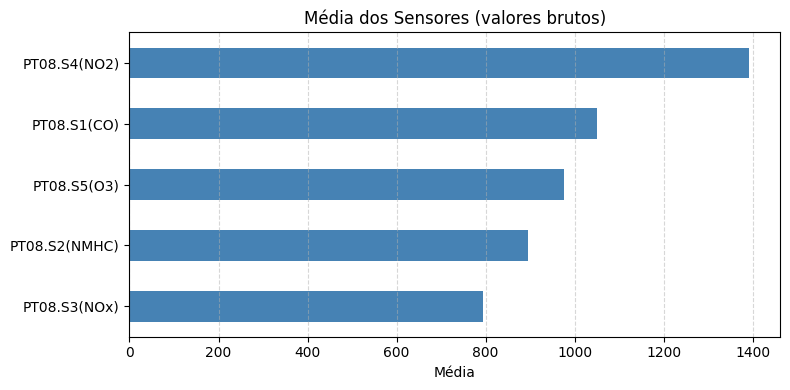

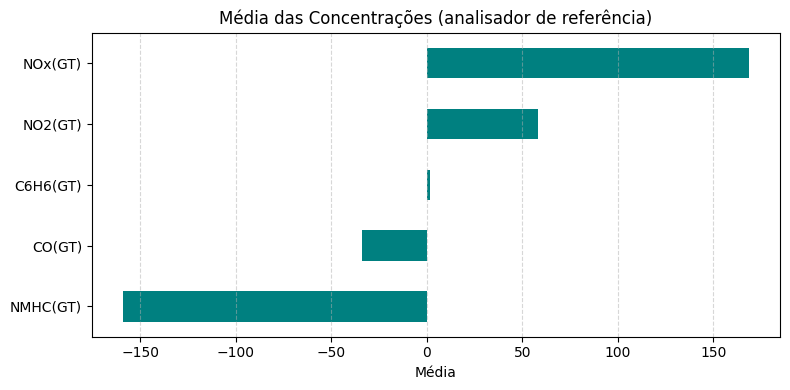

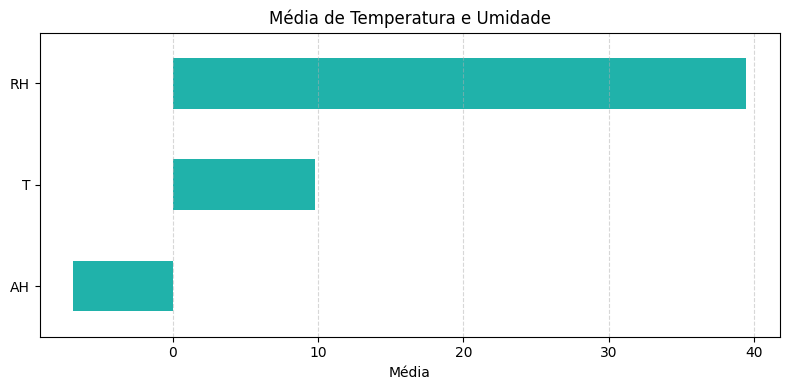

In [52]:
# Definindo os grupos
sensores = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
concentracoes = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
clima = ['T', 'RH', 'AH']

# Calculando as médias
medias_sensores = df[sensores].mean()
medias_concentracoes = df[concentracoes].mean()
medias_clima = df[clima].mean()

# Função para plotar gráfico de barras horizontal
def plot_media_barras(medias, titulo, cor):
    plt.figure(figsize=(8, 4))
    medias.sort_values().plot(kind='barh', color=cor)
    plt.title(titulo)
    plt.xlabel('Média')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gráficos
plot_media_barras(medias_sensores, 'Média dos Sensores (valores brutos)', 'steelblue')
plot_media_barras(medias_concentracoes, 'Média das Concentrações (analisador de referência)', 'teal')
plot_media_barras(medias_clima, 'Média de Temperatura e Umidade', 'lightseagreen')

A média está sendo influenciada pelos valores nulos que estão sendo representados por -200. O exemplo mais claro é o da variável NMHC(GT), cuja média é próxima de -200, indicando que a maioria dos valores são nulos.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [53]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
CO(GT),77.65717
PT08.S1(CO),329.83271
NMHC(GT),139.789093
C6H6(GT),41.380206
PT08.S2(NMHC),342.333252
NOx(GT),257.433866
PT08.S3(NOx),321.993552
NO2(GT),126.940455
PT08.S4(NO2),467.210125
PT08.S5(O3),456.938184


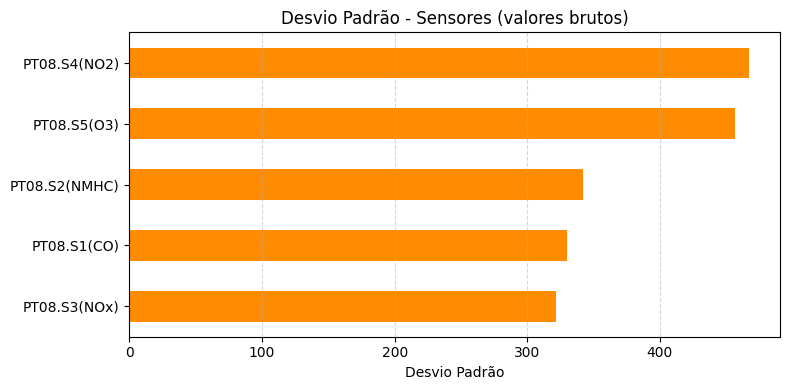

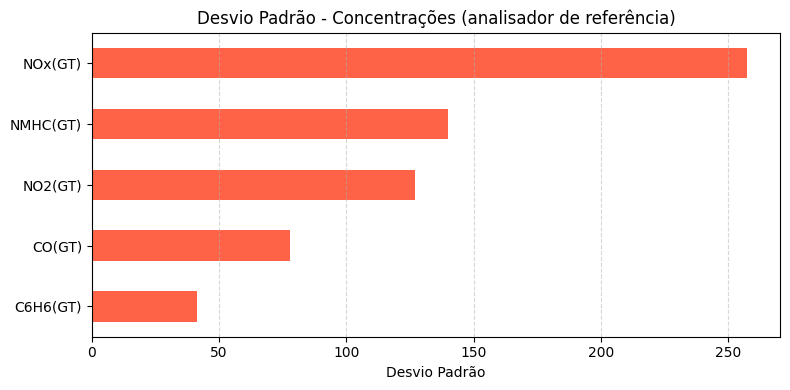

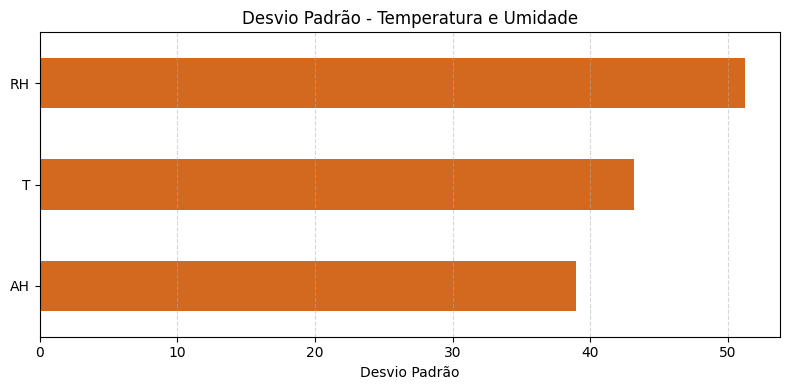

In [54]:
# Calculando os desvios padrão
std_sensores = df[sensores].std()
std_concentracoes = df[concentracoes].std()
std_clima = df[clima].std()

# Função para plotar gráfico de barras horizontal de desvio padrão
def plot_std_barras(std_series, titulo, cor):
    plt.figure(figsize=(8, 4))
    std_series.sort_values().plot(kind='barh', color=cor)
    plt.title(f'Desvio Padrão - {titulo}')
    plt.xlabel('Desvio Padrão')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gráficos
plot_std_barras(std_sensores, 'Sensores (valores brutos)', 'darkorange')
plot_std_barras(std_concentracoes, 'Concentrações (analisador de referência)', 'tomato')
plot_std_barras(std_clima, 'Temperatura e Umidade', 'chocolate')



Os valores de desvio padrão indicam a dispersão das variáveis em relação às suas respectivas médias. No conjunto analisado, os sensores apresentam os maiores desvios, com destaque para PT08.S4(NO2) (≈467) e PT08.S5(O3) (≈457), indicando grande variabilidade nas leituras ao longo do tempo. Entre os poluentes medidos por analisadores de referência, destaca-se o NOx(GT) (≈257), sugerindo forte influência de fontes pontuais e eventos específicos, como picos de tráfego.

Já nas variáveis climáticas, a umidade relativa (RH) apresenta o maior desvio padrão (≈51), seguida da temperatura (T) e da umidade absoluta (AH). Isso evidencia que também houve variação considerável nas condições atmosféricas durante o período de coleta.

A variável datetime foi desconsiderada por não ser numérica. Essa análise ajuda a entender o comportamento e a amplitude de variação das variáveis, reforçando a importância das etapas de padronização e análise exploratória antes da modelagem.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

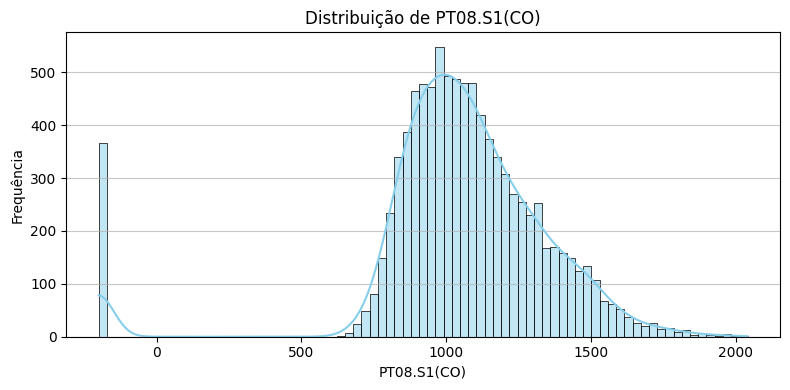

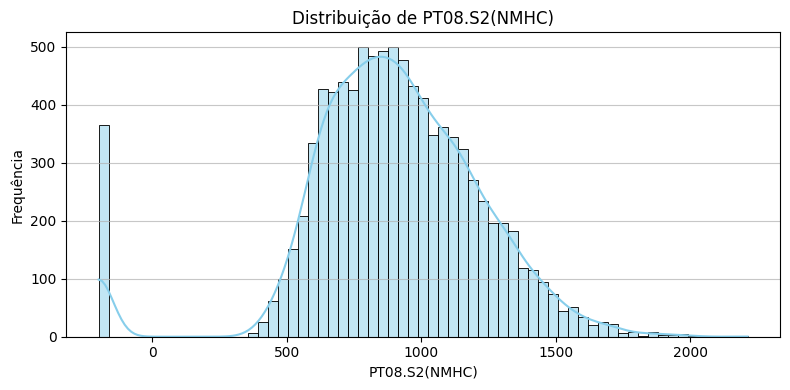

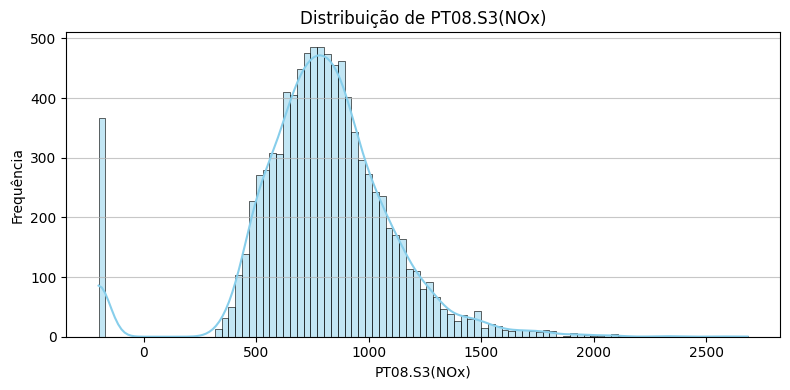

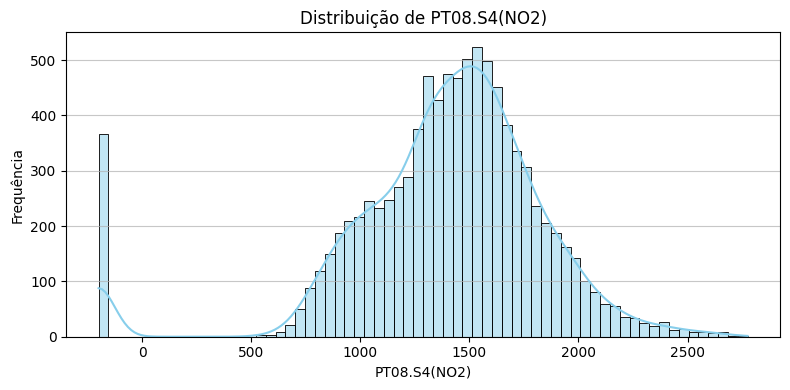

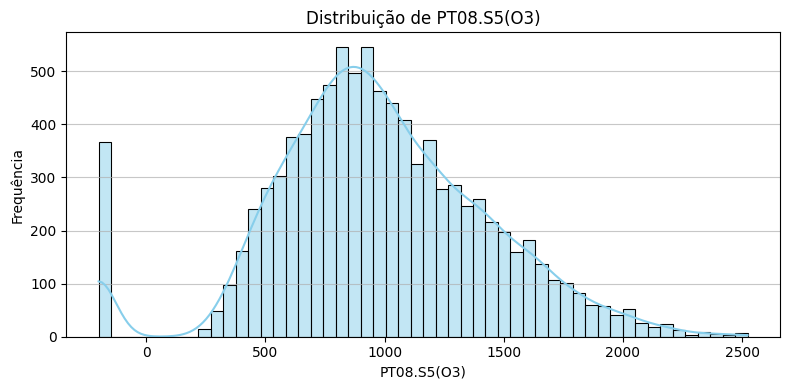

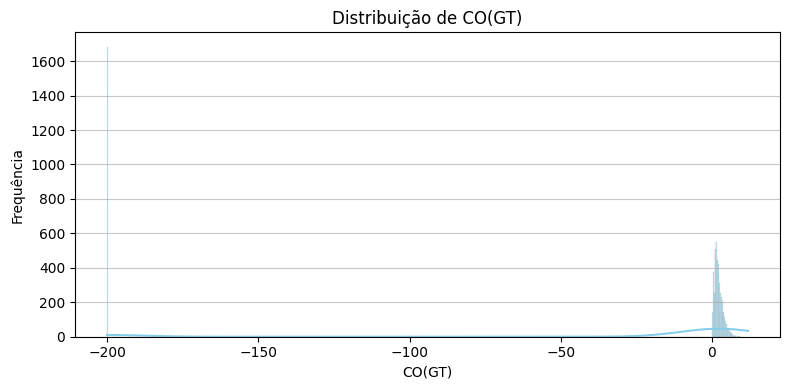

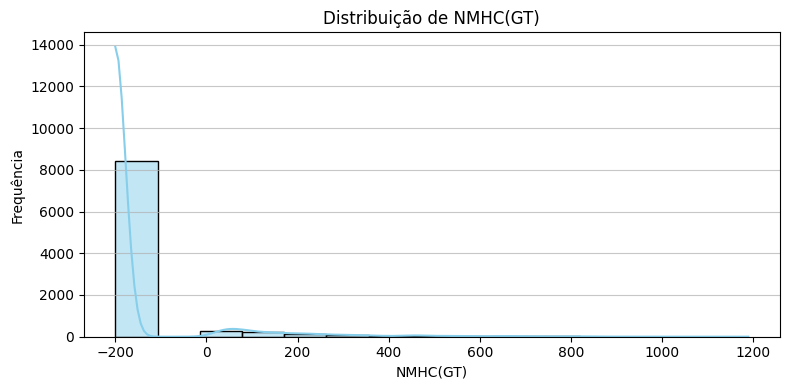

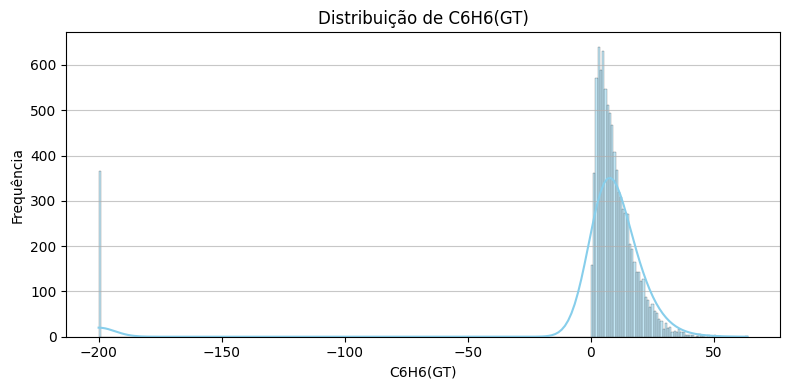

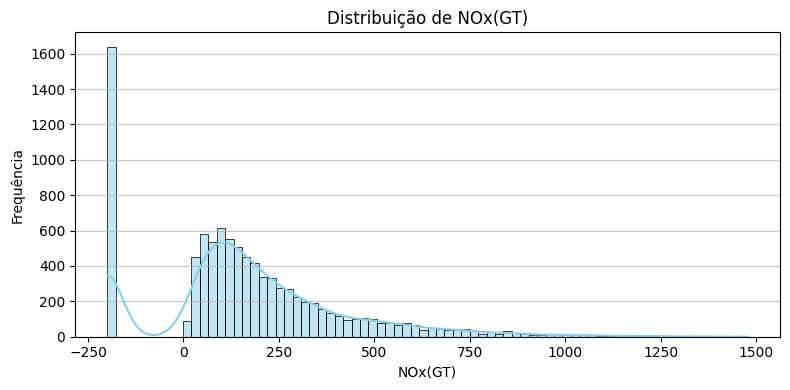

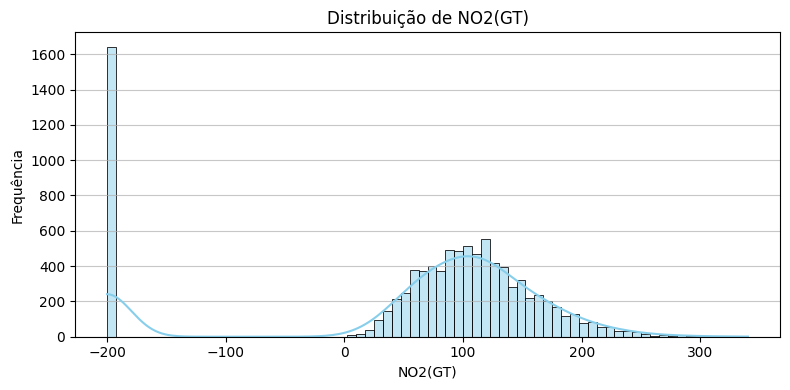

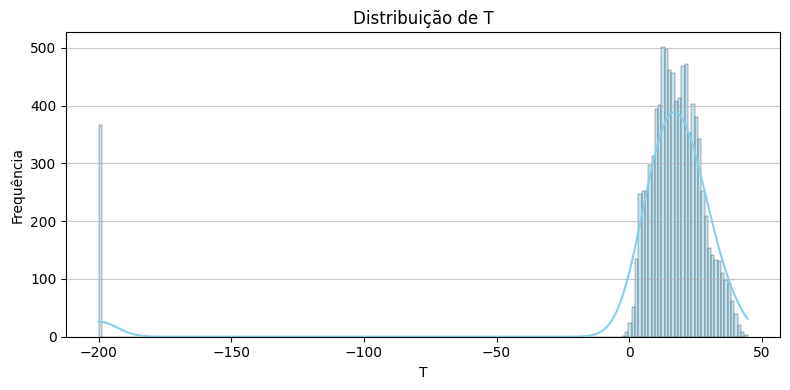

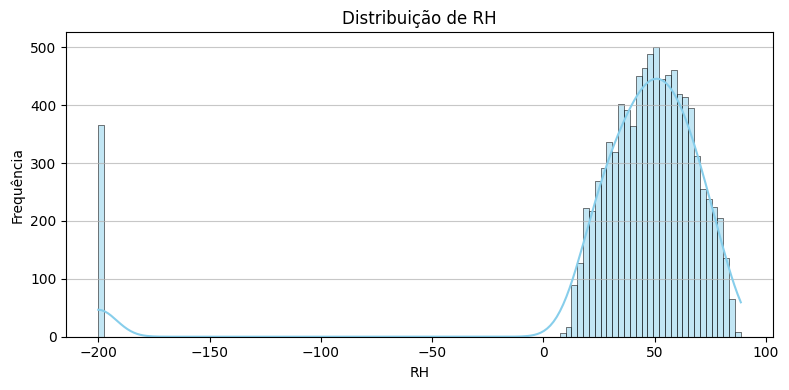

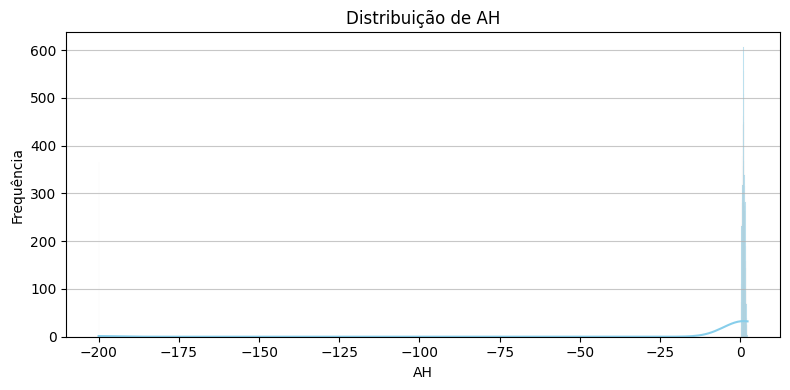

In [55]:
variaveis_para_hist = sensores + concentracoes + clima

for var in variaveis_para_hist:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

O histograma facilita a visualização da distribuição dos dados e é possível observar características da distribuição rapidamente. Os conjuntos com valores inválidos expressivos podem ser rapidamente identificados, uma vez que a sua representação é feita pelo preenchimento do campo pelo valor -200. A biblioteca Seaborn é uma ótima opção para gerar histogramas pela possibilidade de inclusão de linha de densidade. No caso do presente dataframe, alguns histogramas foram gerados incorretamente resultando em uma visualização inadequada, como o caso da variável CO(GT). Dessa forma, será usado o pacote do Matplotlib para obter resultados corretos em todas as variáveis.

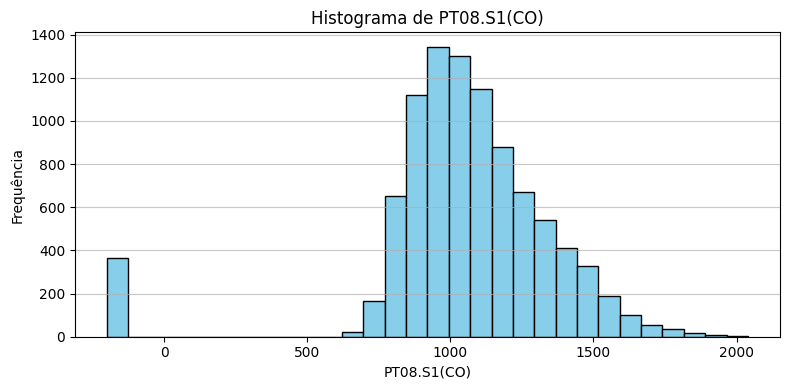

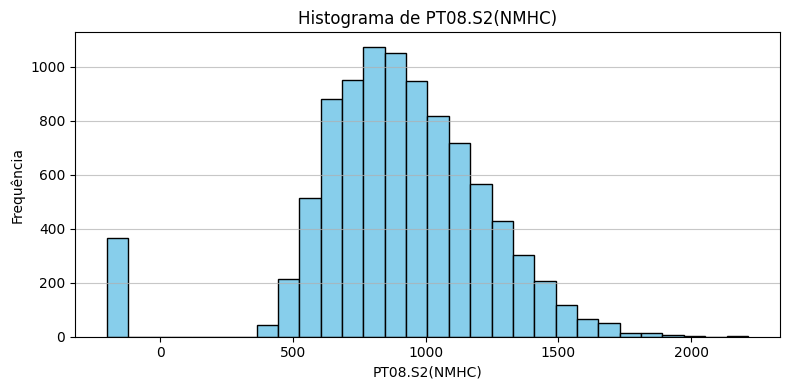

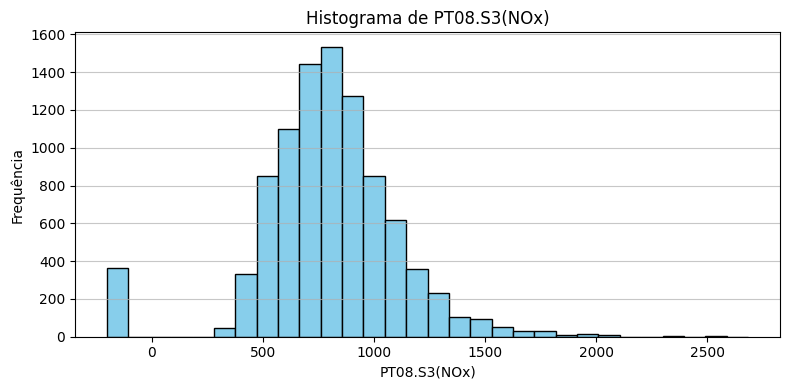

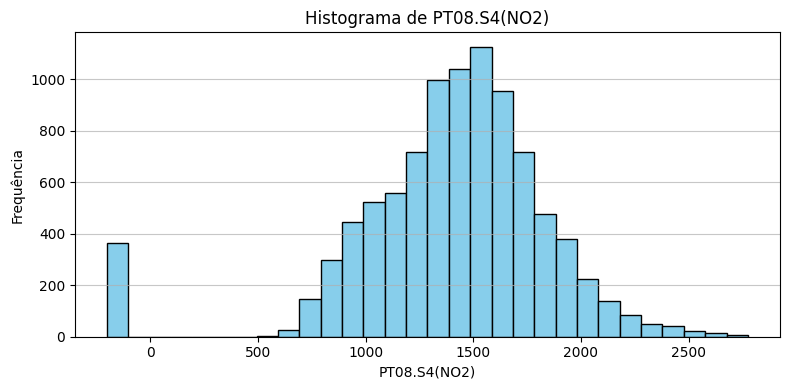

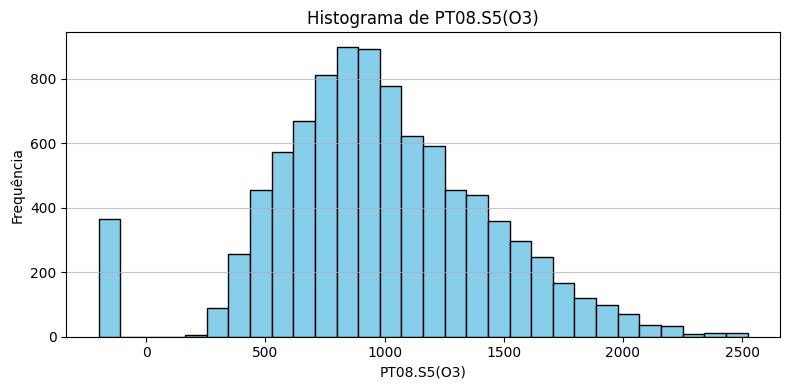

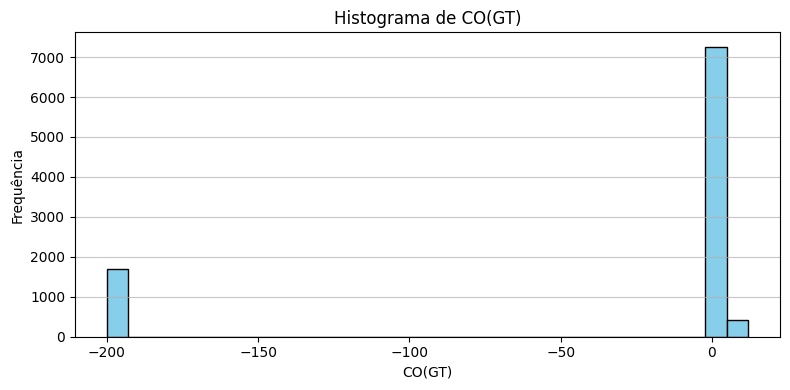

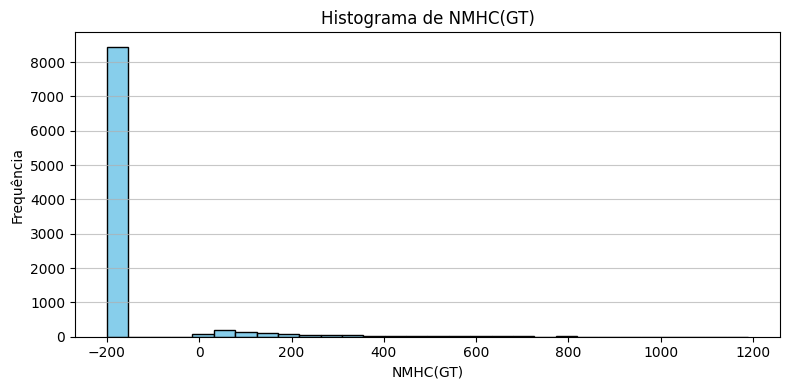

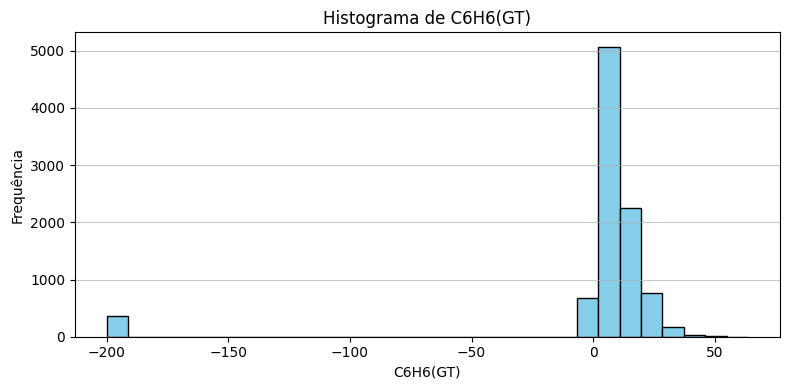

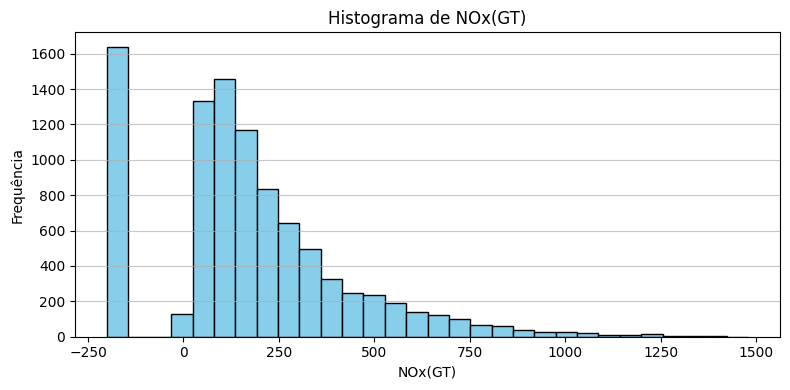

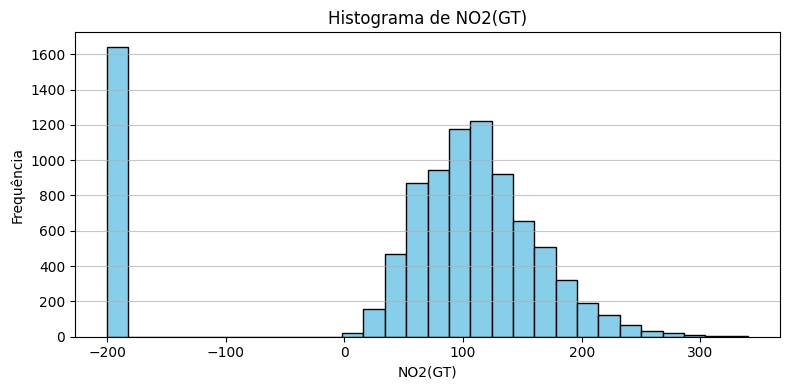

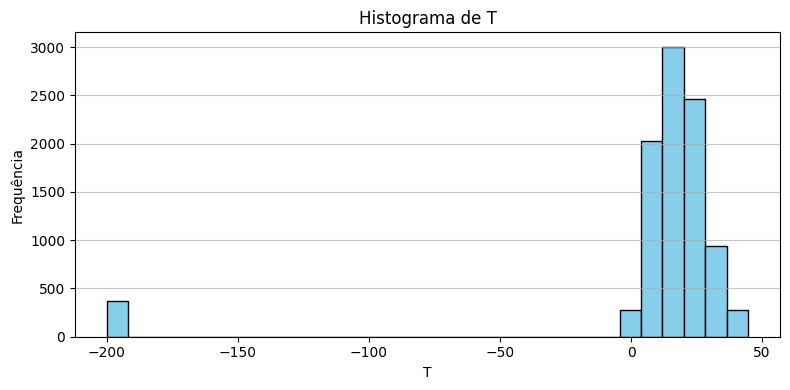

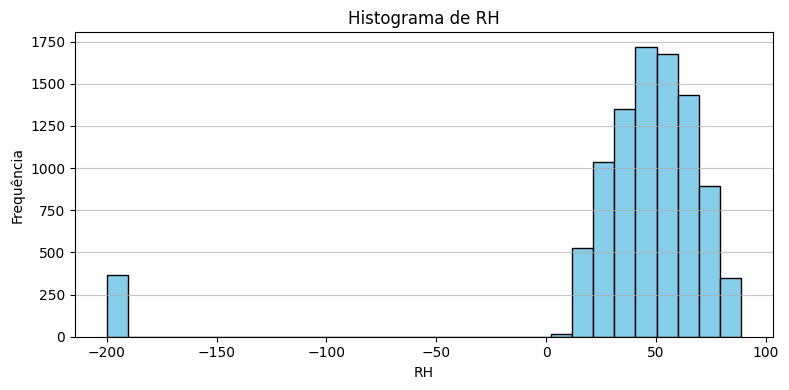

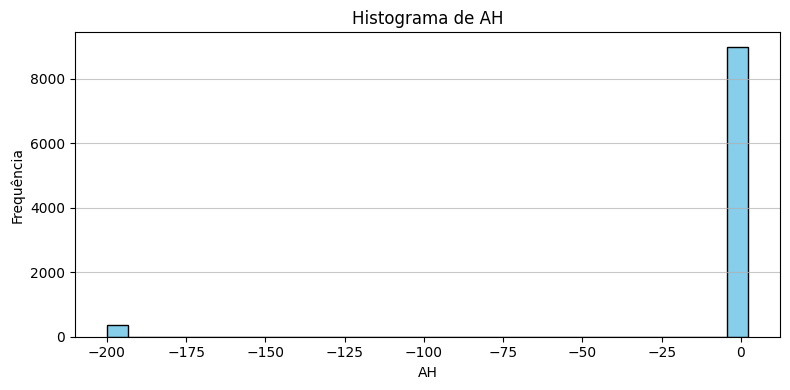

In [56]:
for var in variaveis_para_hist:
    plt.figure(figsize=(8, 4))
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

Essa biblioteca gerou perfeitamente os histogramas. Destaca o número alto de valores faltantes para a variável NHMC(GT), que pode ser vista rapidamente ao analisar o seu histograma. Na etapa de pré-processamento de dados, esses valores precisam ser devidamente tratados.

## Boxplot

O boxplot é uma representação gráfica que resume a distribuição de um conjunto de dados numéricos, destacando a mediana, os quartis e os possíveis outliers (valores discrepantes). Ele é especialmente útil para comparar variáveis e identificar variações em diferentes grupos.
Inicialmente, será realizada uma análise exploratória utilizando boxplots para observar a distribuição geral dos dados, separados em brutos, concentrações e variáveis climáticas, a fim de identificar a mediana, dispersão e presença de outliers em cada variável do conjunto. Em seguida, a análise será aprofundada com a geração de boxplots mensais dos dados de concentração de poluentes, agrupando-os por mês. Isso possibilitará visualizar padrões sazonais e comparar o comportamento das concentrações ao longo do ano, facilitando a identificação de períodos com maior variabilidade ou níveis críticos de poluição atmosférica.

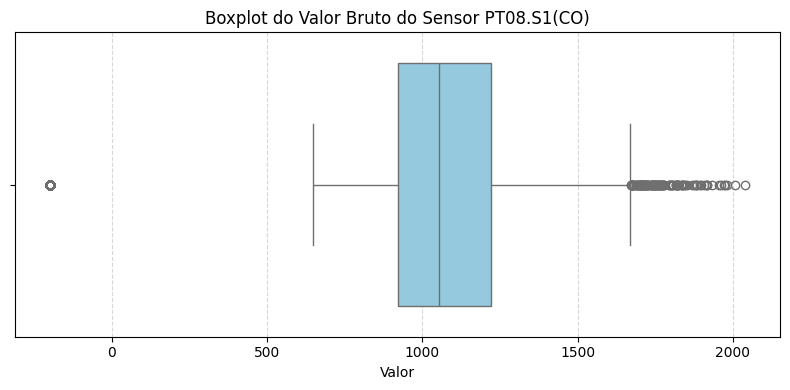

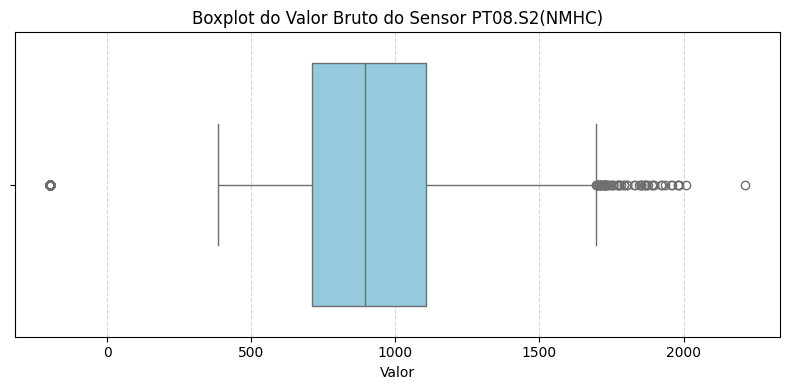

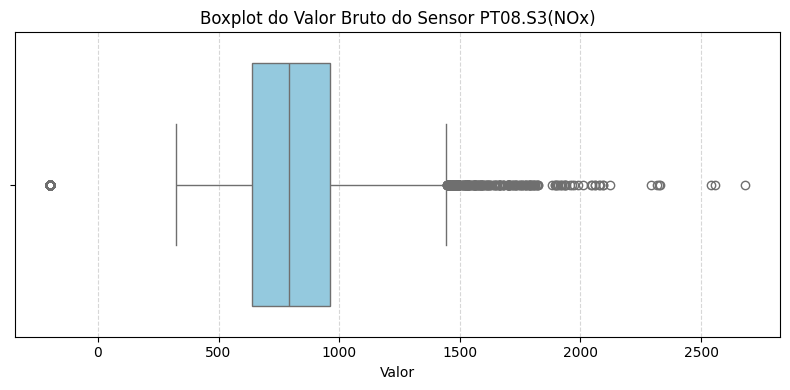

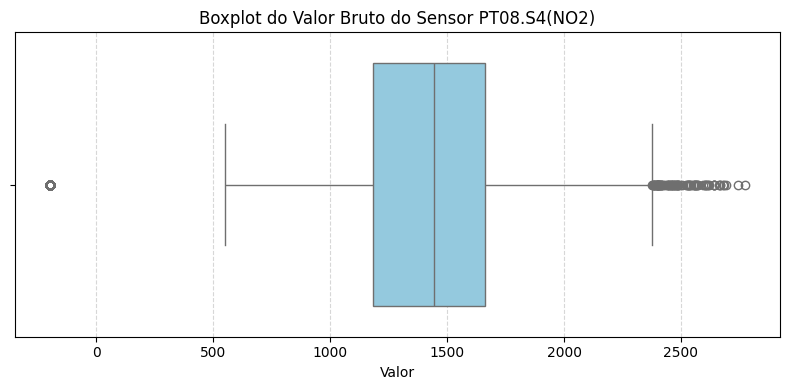

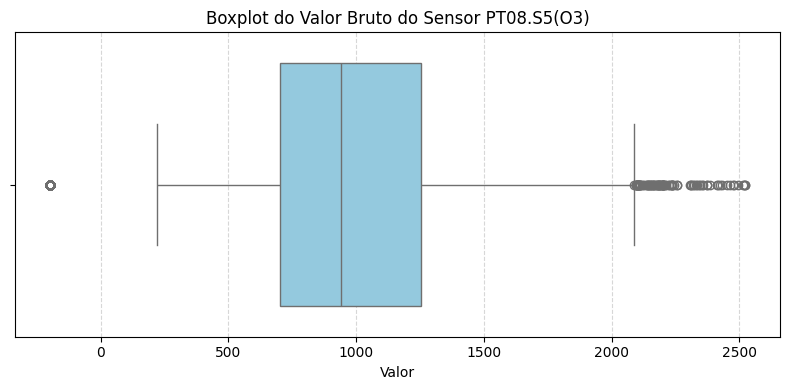

In [57]:
for sensor in sensores:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[sensor], color='skyblue')
    plt.title(f'Boxplot do Valor Bruto do Sensor {sensor}')
    plt.xlabel('Valor')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

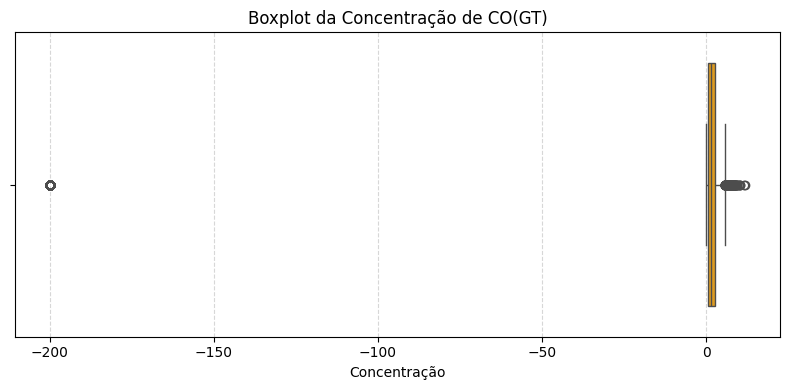

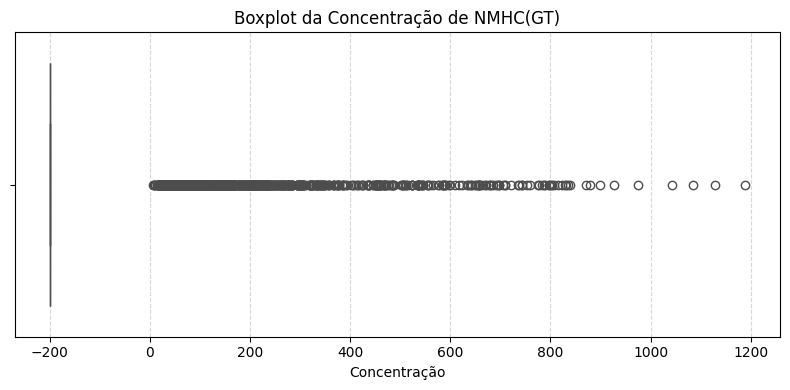

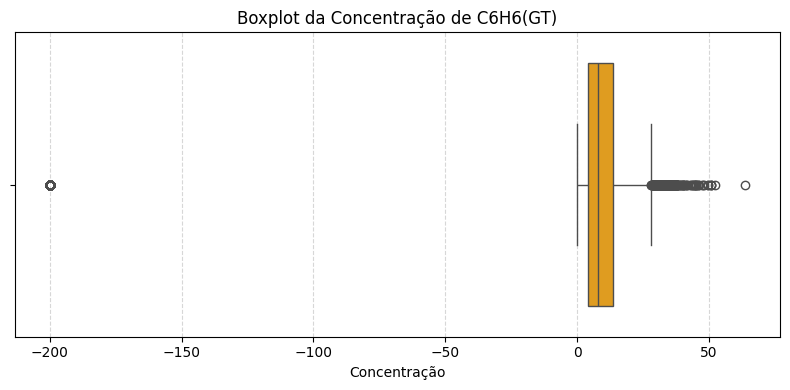

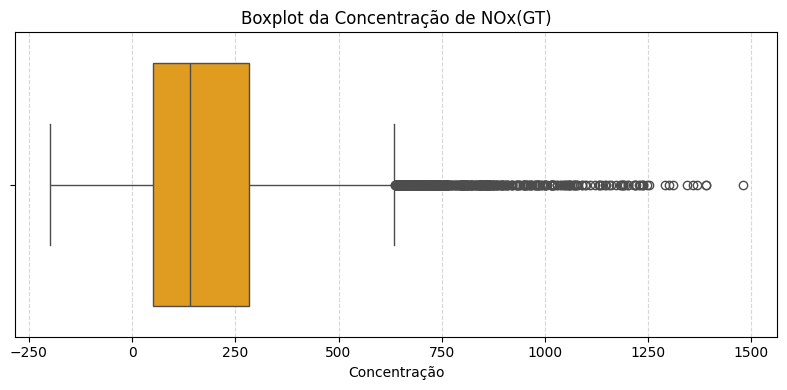

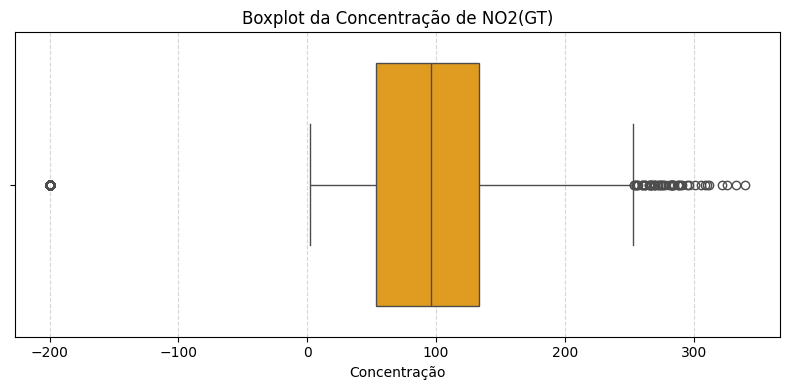

In [58]:
for poluente in concentracoes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[poluente], color='orange')
    plt.title(f'Boxplot da Concentração de {poluente}')
    plt.xlabel('Concentração')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

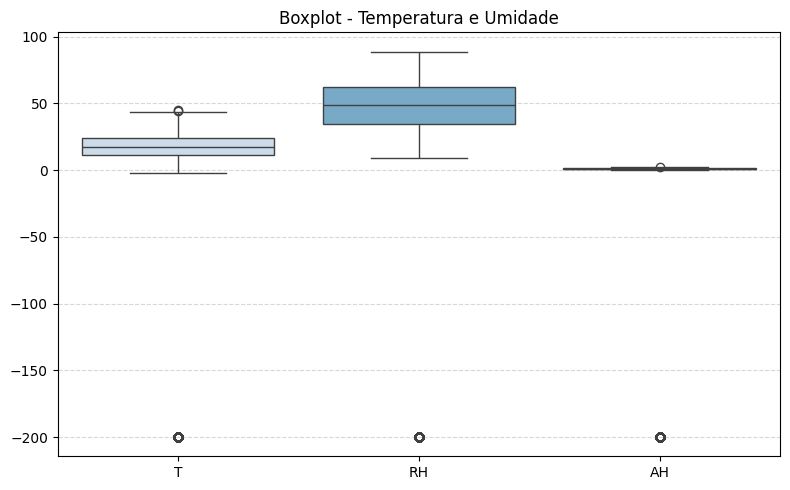

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[clima], palette='Blues')
plt.title('Boxplot - Temperatura e Umidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A análise exploratória por meio dos boxplots evidencia que os valores brutos dos sensores apresentam maior consistência em relação aos valores de concentração, os quais demonstram uma variabilidade mais acentuada e a presença expressiva de valores nulos representados por -200. Esse padrão pode indicar possíveis falhas ou limitações nos processos de cálculo das concentrações, os quais dependem de múltiplas variáveis. Ademais, considerando que os dados abrangem um período de um ano completo, atravessando diferentes estações e condições climáticas, é esperado um certo grau de dispersão nas variáveis, aspecto que se confirma nas distribuições observadas com outliners.

/tmp/ipython-input-60-1480385048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


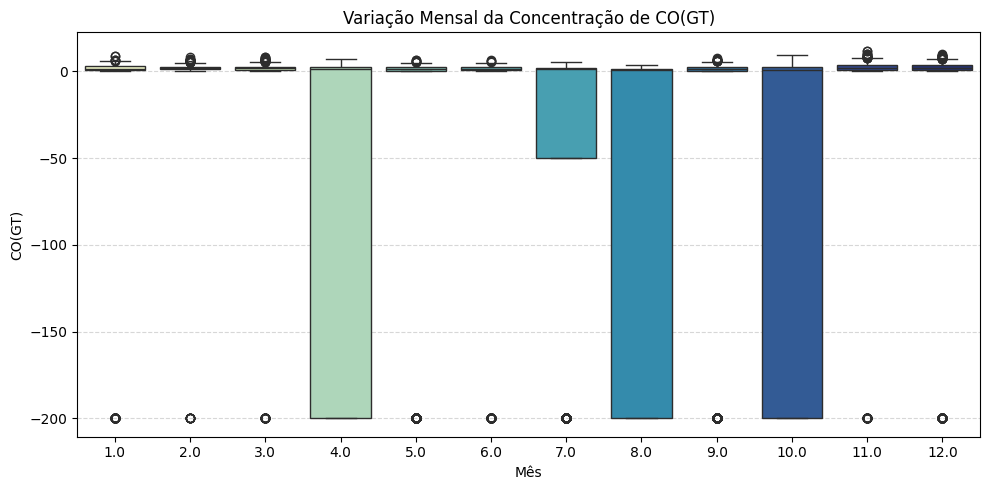

/tmp/ipython-input-60-1480385048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


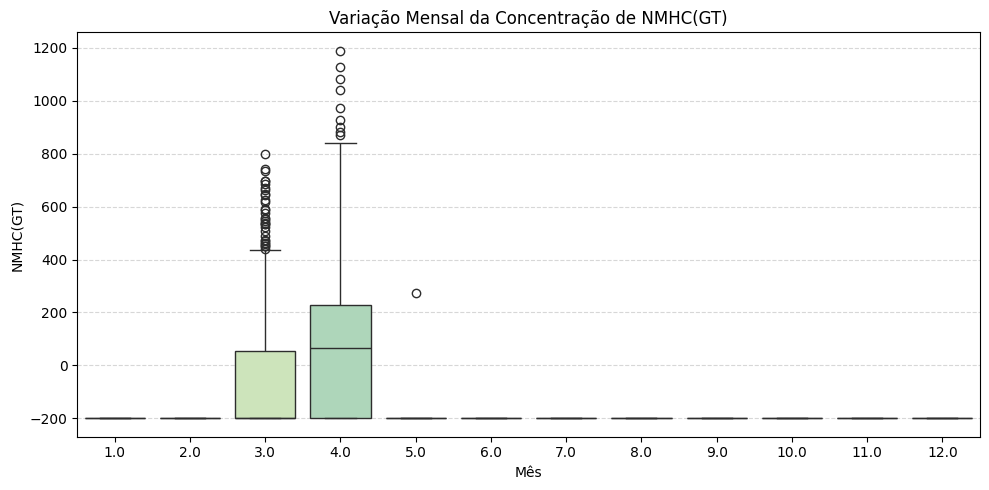

/tmp/ipython-input-60-1480385048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


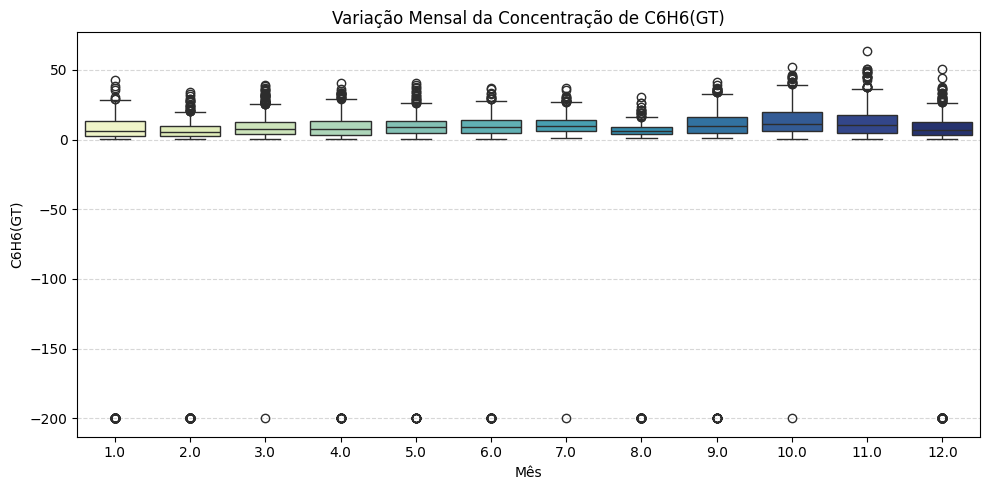

/tmp/ipython-input-60-1480385048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


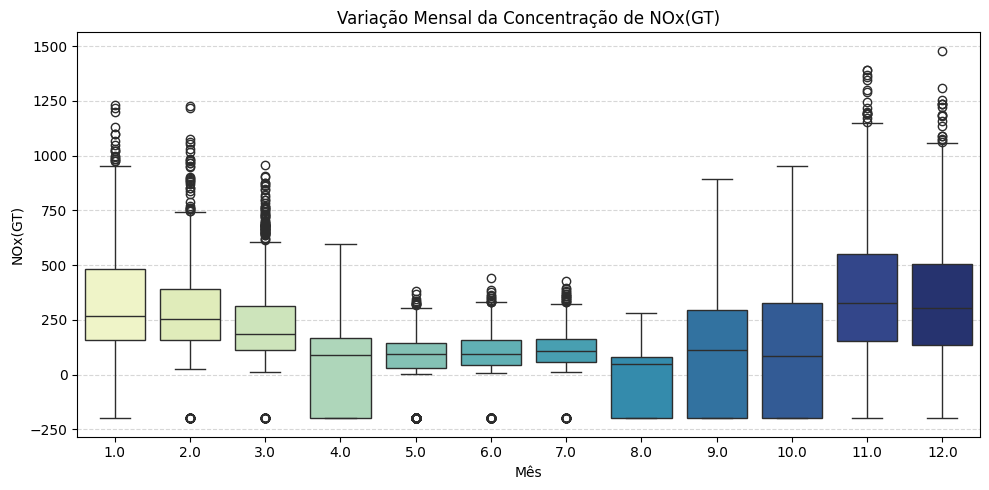

/tmp/ipython-input-60-1480385048.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


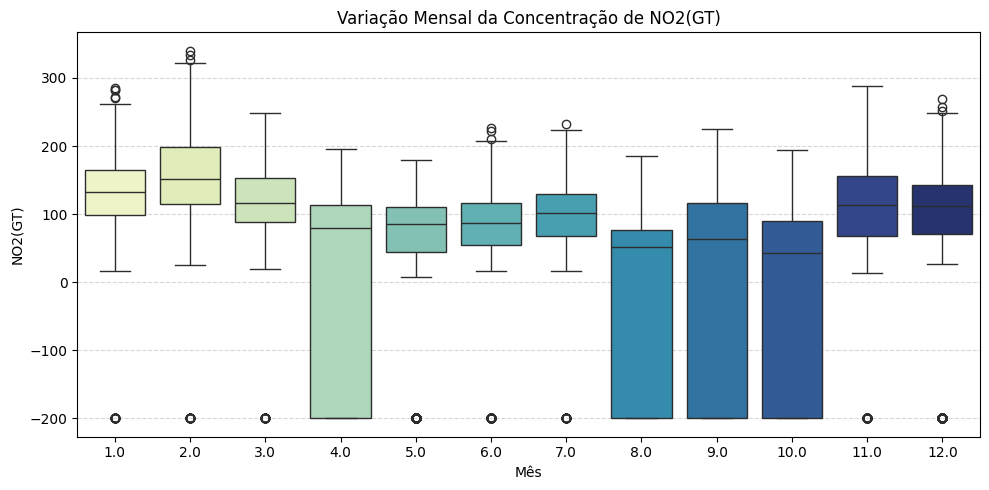

In [60]:
df['month'] = df['datetime'].dt.month

variaveis_gt = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for var in variaveis_gt:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')
    plt.title(f'Variação Mensal da Concentração de {var}')
    plt.xlabel('Mês')
    plt.ylabel(f'{var}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

A análise dos boxplots mensais contribui para a identificação de períodos com maior incidência de outliers. Observa-se que, para a variável CO(GT), os meses de abril, agosto e outubro apresentam uma concentração mais elevada de outliers em comparação aos demais. No caso da variável NMHC(GT), torna-se evidente a grande quantidade de dados ausentes, aspecto que já havia sido identificado anteriormente por meio do histograma. Para a variável C6H6(GT), a distribuição se mostra mais regular, com menor ocorrência de outliers abaixo do valor mínimo. Os outliers acima do valor máximo, por sua vez, podem indicar episódios pontuais de maior poluição atmosférica por benzeno.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [61]:
# Matriz de correlação
df_numerico = df.select_dtypes(include=['float64'])

correlacao = df_numerico.corr()

print("\nMatriz de Correlação:")
correlacao



Matriz de Correlação:


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,-0.146075
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,-0.006105
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,-0.230206
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,0.046754
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,0.111403
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,-0.026303
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.031109
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,-0.232317
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,0.141687
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.053750


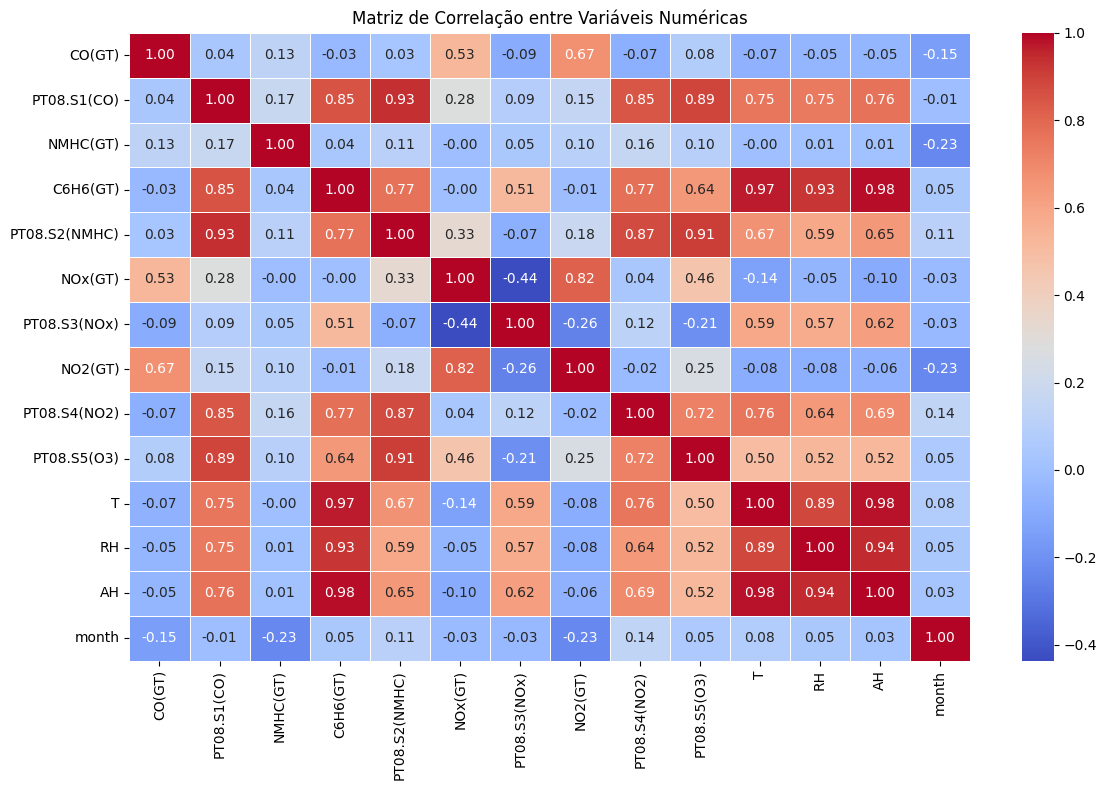

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

A matriz de correlação permite observar como as variáveis do conjunto se relacionam entre si numericamente. Foram avaliadas as relações entre os poluentes medidos, os sensores e as variáveis climáticas.

#### Correlação entre sensores e variáveis de referência
- A correlação entre o sensor `PT08.S1(CO)` e o valor de referência `CO(GT)` é baixa (≈ 0.04), o que pode indicar ruído ou inconsistência na medição direta do sensor para esse poluente.
- Já o sensor `PT08.S4(NO2)`, que deveria estar relacionado ao `NO2(GT)`, também apresenta correlação fraca (≈ -0.02), o que chama atenção para uma possível limitação técnica na captura da concentração desse gás.

#### Relações entre poluentes
- Observa-se uma correlação forte e positiva entre `NOx(GT)` e `NO2(GT)` (≈ 0.82), o que é esperado dada a relação química entre esses compostos.
- A variável `CO(GT)` apresenta correlação significativa com `NO2(GT)` (≈ 0.67), sugerindo que podem ter fontes comuns de emissão, como a queima de combustíveis fósseis.

#### Correlação entre variáveis climáticas
- As variáveis climáticas `T` (temperatura), `RH` (umidade relativa) e `AH` (umidade absoluta) possuem entre si correlações bastante elevadas:
  - `T` e `AH`: ≈ 0.98
  - `RH` e `AH`: ≈ 0.94
  - `T` e `RH`: ≈ 0.89  
Essas correlações indicam que há uma forte dependência entre os fatores climáticos analisados, o que pode influenciar diretamente a dispersão ou concentração de poluentes atmosféricos.

#### Correlação entre sensores
- Sensores como `PT08.S1(CO)` e `PT08.S2(NMHC)` apresentam correlação muito alta (≈ 0.93), indicando possível sobreposição nas leituras ou que reagem de forma semelhante às mesmas condições ambientais.
- Correlações elevadas entre sensores e variáveis climáticas também indicam que os sensores podem estar captando variações atmosféricas além das concentrações esperadas.


É importante destacar que os dados utilizados nesta análise ainda não foram totalmente tratados. A presença de valores ausentes ou inválidos (como os -200) pode impactar as correlações. O tratamento adequado dos dados, como a substituição ou remoção desses valores, poderá refinar significativamente a interpretação dos resultados.










# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

# Tratamento de Valores Nulos

A seguir, os valores nulos (representados por -200 no dataframe) serão devidamente tratados. Inicia-se fazendo uma tabela apresentando a quantidade de valores nulos de cada variável o quanto eles representam do total de instâncias.

In [63]:
total_instancias = 9358

valores_nulos = (df == -200).sum()

porcentagem_nulos = (valores_nulos / total_instancias) * 100

nulos_df = pd.DataFrame({
    'Valores -200': valores_nulos,
    'Porcentagem (%)': porcentagem_nulos
})

nulos_df = nulos_df[nulos_df['Valores -200'] > 0].sort_values(by='Valores -200', ascending=False)

print("Quantidade e porcentagem de valores -200 por coluna:")
display(nulos_df.round(2))

Quantidade e porcentagem de valores -200 por coluna:


,Valores -200,Porcentagem (%)
NMHC(GT),8443,90.22
CO(GT),1683,17.98
NO2(GT),1642,17.55
NOx(GT),1639,17.51
PT08.S1(CO),366,3.91
PT08.S2(NMHC),366,3.91
C6H6(GT),366,3.91
PT08.S3(NOx),366,3.91
PT08.S4(NO2),366,3.91
PT08.S5(O3),366,3.91


A variável NMHC(GT) é quase toda composta por valores nulos, sendo a análise dos seus dados muito dificultada. As variáveis CO(GT), NO2(GT) e NOx(GT) apresetam quantidades de valores nulos próximas e não tão significativas como a anteriormente citada. Já as demais variáveis tem o mesmo número de valores nulos, possívelmente do mesmo horário e dia. O código abaixo verifica se é isso o que ocorre de fato.

In [64]:
# Listas das colunas dos sensores e das variáveis climáticas
colunas_sensores = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
colunas_clima = ['T', 'RH', 'AH']

# Verifica em quais linhas as colunas dos sensores têm -200
nulos_sensores = df[colunas_sensores] == -200

# Verifica em quais linhas as colunas climáticas têm -200
nulos_clima = df[colunas_clima] == -200

# Soma por linha se há -200 em ao menos uma das colunas de cada grupo
linhas_sensores = nulos_sensores.all(axis=1)
linhas_clima = nulos_clima.all(axis=1)

# Verifica quantas linhas coincidem
coincidentes = (linhas_sensores & linhas_clima).sum()

print(f"Número de linhas com -200 em todas as colunas de sensores e clima: {coincidentes}")

Número de linhas com -200 em todas as colunas de sensores e clima: 366


Todas as linhas coincidem. Por tanto, essas instâncias serão eliminadas do dataframe.

In [65]:
# Remove as linhas onde todos os valores de sensores e clima são -200
df = df[~((df[sensores + clima] == -200).all(axis=1))].reset_index(drop=True)

In [66]:
total_instancias = 9358

valores_nulos = (df == -200).sum()

porcentagem_nulos = (valores_nulos / total_instancias) * 100

nulos_df = pd.DataFrame({
    'Valores -200': valores_nulos,
    'Porcentagem (%)': porcentagem_nulos
})

nulos_df = nulos_df[nulos_df['Valores -200'] > 0].sort_values(by='Valores -200', ascending=False)

print("Quantidade e porcentagem de valores -200 por coluna:")
display(nulos_df.round(2))

Quantidade e porcentagem de valores -200 por coluna:


,Valores -200,Porcentagem (%)
NMHC(GT),8104,86.60
CO(GT),1647,17.60
NO2(GT),1598,17.08
NOx(GT),1595,17.04


Para entender melhor a distribuição das falhas, o próximo bloco de código gera um quadro que as separa por mês.

In [67]:
# Lista de variáveis com valores -200
variaveis_faltantes = ['NMHC(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)']

# Contar total de registros por mês
total_por_mes = df.groupby('month').size()

# Criar dataframe com contagens de -200 por mês
contagem_falhas = pd.DataFrame()

for var in variaveis_faltantes:
    contagem_falhas[var] = df[df[var] == -200].groupby(df['month']).size()

# Preencher meses sem valores -200 com zero
contagem_falhas = contagem_falhas.fillna(0).astype(int)

# Calcular porcentagem em relação ao total de linhas por mês
porcentagem_falhas = contagem_falhas.div(total_por_mes, axis=0) * 100

# Renomear colunas para refletir porcentagens
porcentagem_falhas.columns = [col + ' (%)' for col in porcentagem_falhas.columns]

# Unir contagem e porcentagem em um único dataframe
tabela_final = pd.concat([contagem_falhas, porcentagem_falhas], axis=1)

# Exibir a tabela
display(tabela_final)

,NMHC(GT),CO(GT),NO2(GT),NOx(GT),NMHC(GT) (%),CO(GT) (%),NO2(GT) (%),NOx(GT) (%)
month,,,,,,,,
1.0,683,67,32,32,100.000000,9.809663,4.685212,4.685212
2.0,596,8,27,27,100.000000,1.342282,4.530201,4.530201
3.0,846,38,33,33,67.517957,3.032721,2.633679,2.633679
4.0,301,227,233,233,38.589744,29.102564,29.871795,29.871795
5.0,729,138,132,132,99.863014,18.904110,18.082192,18.082192
6.0,682,75,70,69,100.000000,10.997067,10.263930,10.117302
7.0,743,185,33,32,100.000000,24.899058,4.441454,4.306864
8.0,695,267,242,241,100.000000,38.417266,34.820144,34.676259
9.0,702,147,258,258,100.000000,20.940171,36.752137,36.752137


Para uma melhor visualização, o próximo bloco de código gera um gráfico de barras.

In [68]:
variaveis_gt = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'NMHC(GT)']

falhas_por_mes = df[df[variaveis_gt].isin([-200]).any(axis=1)].groupby('month')[variaveis_gt].apply(lambda x: (x == -200).sum()).reset_index()
falhas_por_mes.set_index('month', inplace=True)

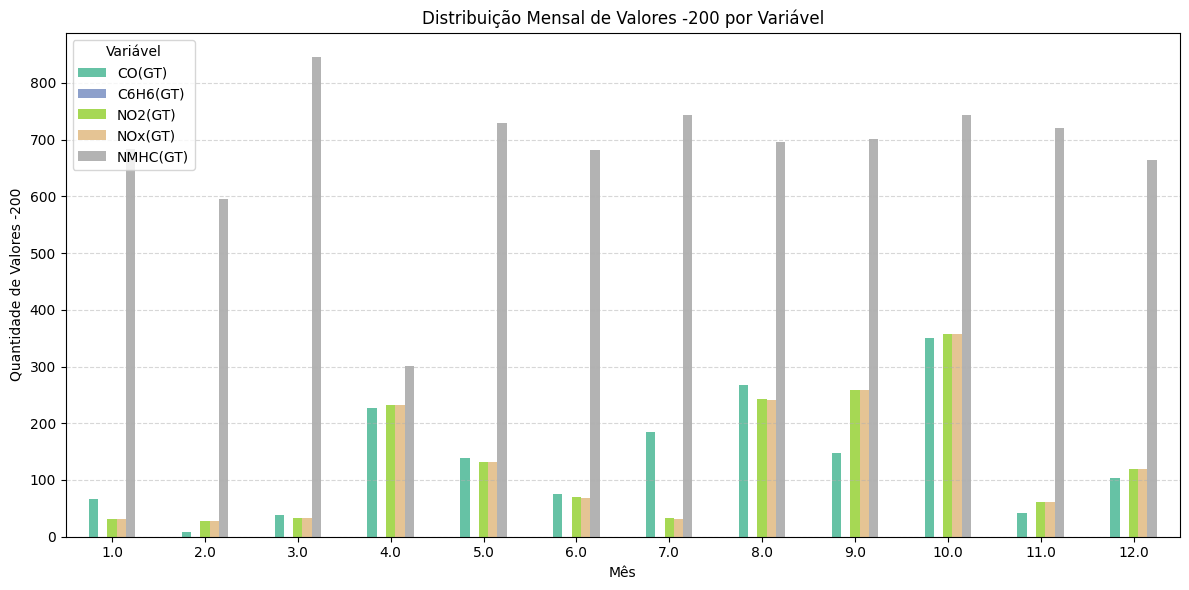

In [69]:
falhas_por_mes.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Distribuição Mensal de Valores -200 por Variável')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Valores -200')
plt.xticks(rotation=0)
plt.legend(title='Variável')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Para o pré-processamento do MVP, será adotada a exclusão da variável NMHC(GT), devido à elevada proporção de valores nulos que comprometem sua qualidade e relevância analítica. Para as variáveis CO(GT), NO2(GT) e NOx(GT), será realizada a imputação dos valores faltantes utilizando a mediana mensal, de modo a preservar os padrões sazonais presentes nos dados ao longo do ano. Essa estratégia visa manter a integridade do conjunto de dados e minimizar possíveis vieses que métodos de imputação globais poderiam introduzir. Contudo, é importante reconhecer que os valores imputados não correspondem a medições reais, o que pode impactar análises mais sensíveis realizadas posteriormente.

In [70]:
# Excluir a coluna NMHC(GT)
df = df.drop(columns=['NMHC(GT)'])

# Função para imputar valores faltantes (-200) pela mediana mensal
def imputar_mediana_mensal(df, coluna):
    # Substituir -200 por NaN para facilitar a imputação
    df[coluna] = df[coluna].replace(-200, np.nan)

    # Calcular mediana mensal (ignorando NaNs)
    medianas_mensais = df.groupby('month')[coluna].transform('median')

    # Preencher os NaNs com a mediana mensal correspondente
    df[coluna] = df[coluna].fillna(medianas_mensais)

    return df

# Colunas para imputação
colunas_imputar = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']

# Aplicar imputação para cada coluna
for col in colunas_imputar:
    df = imputar_mediana_mensal(df, col)

# Conferir se ainda existem valores -200 (faltantes)
print(df[colunas_imputar].isin([-200]).sum())

CO(GT)     0
NO2(GT)    0
NOx(GT)    0
dtype: int64


## Dados para a modelagem
O presente MVP não avançará para a etapa de modelagem de dados e, portanto, não será feita a divisão dos dados entre teste e treinamento. A seguir, serão realizadas as etapas de normalização e padronização dos dados.

In [71]:
# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [72]:
scaler_norm = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler_norm.fit_transform(df[colunas_numericas]), columns=colunas_numericas)

print("Primeiras linhas dos dados normalizados:")
print(df_normalizado.head())

Primeiras linhas dos dados normalizados:
     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0  0.211864     0.511845  0.185535       0.362097  0.111036      0.310885   
1  0.161017     0.463029  0.146226       0.312398  0.068382      0.360864   
2  0.177966     0.541996  0.139937       0.303659  0.087339      0.346463   
3  0.177966     0.523331  0.143082       0.308575  0.115098      0.326133   
4  0.127119     0.448672  0.100629       0.247406  0.087339      0.373994   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH     month  
0  0.335347      0.513040     0.454822  0.333333  0.499371  0.280066  0.181818  
1  0.271903      0.453237     0.326238  0.326882  0.484277  0.264282  0.181818  
2  0.338369      0.451439     0.370547  0.296774  0.563522  0.276352  0.181818  
3  0.362538      0.464478     0.426586  0.277419  0.638994  0.294190  0.181818  
4  0.344411      0.422212     0.386186  0.281720  0.633962  0.295216  0.181818  


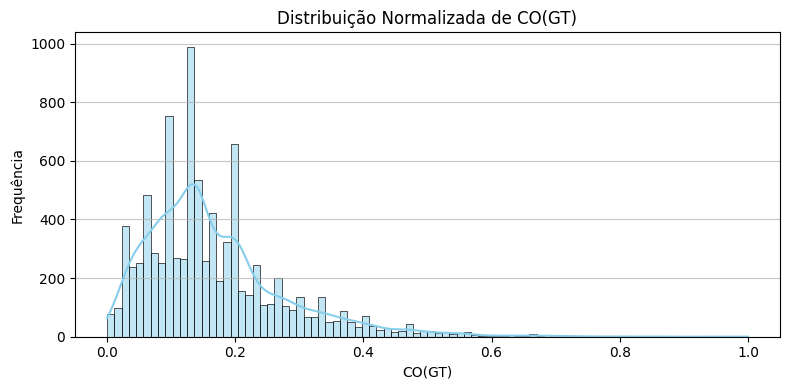

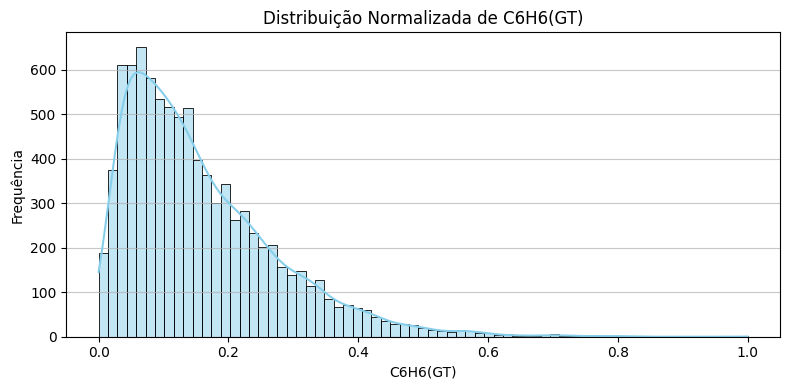

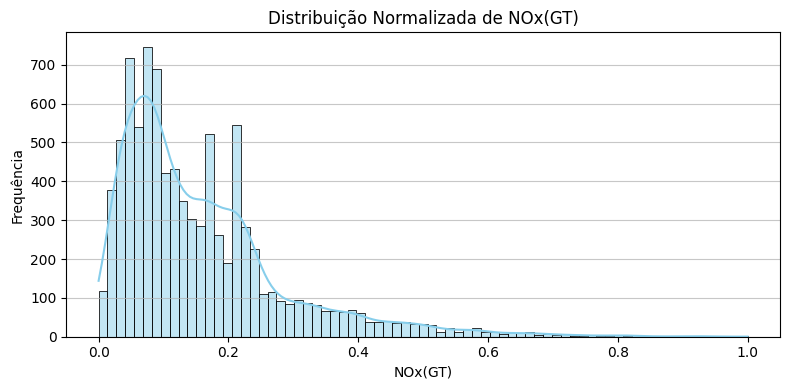

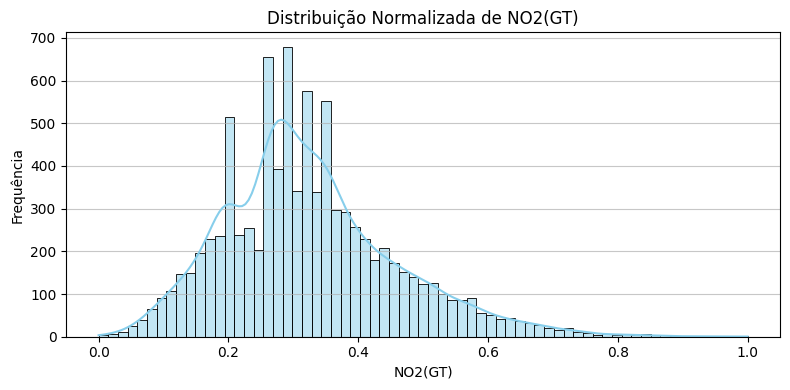

In [73]:
variaveis_GT = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for var in variaveis_GT:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_normalizado[var], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição Normalizada de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

Os histogramas gerados após a normalização mostram que os valores foram escalados para o intervalo de 0 a 1 e agora sem as distorções causadas pelos valores -200.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [74]:
scaler_std = StandardScaler()
df_padronizado = pd.DataFrame(scaler_std.fit_transform(df[colunas_numericas]), columns=colunas_numericas)

print("Primeiras linhas dos dados padronizados:")
print(df_padronizado.head())

Primeiras linhas dos dados padronizados:
     CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0  0.395457     1.198550  0.243898       0.400450 -0.364805      0.858660   
1 -0.060607     0.885284 -0.091699       0.059391 -0.692151      1.318156   
2  0.091414     1.392038 -0.145395      -0.000575 -0.546664      1.185759   
3  0.091414     1.272260 -0.118547       0.033156 -0.333629      0.998845   
4 -0.364650     0.793147 -0.480992      -0.386608 -0.546664      1.438871   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH     month  
0  0.082404      0.680947     0.615100 -0.534197 -0.019300 -0.663043 -0.976555  
1 -0.392270      0.296762    -0.127757 -0.568166 -0.088601 -0.743035 -0.976555  
2  0.105008      0.285208     0.128228 -0.726687  0.275226 -0.681865 -0.976555  
3  0.285836      0.368977     0.451972 -0.828594  0.621728 -0.591471 -0.976555  
4  0.150215      0.097448     0.218575 -0.805948  0.598628 -0.586271 -0.976555  


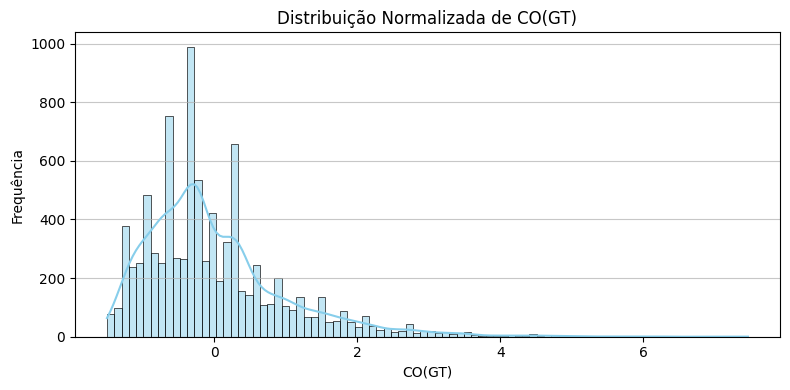

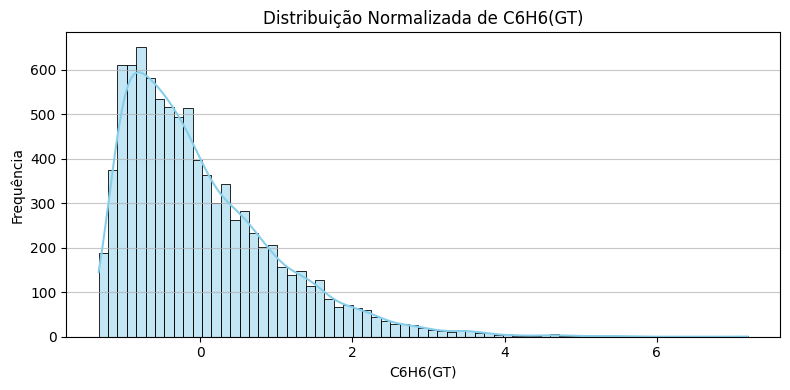

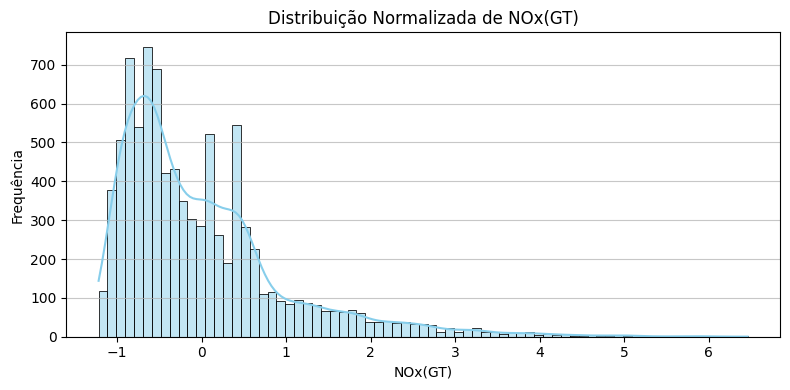

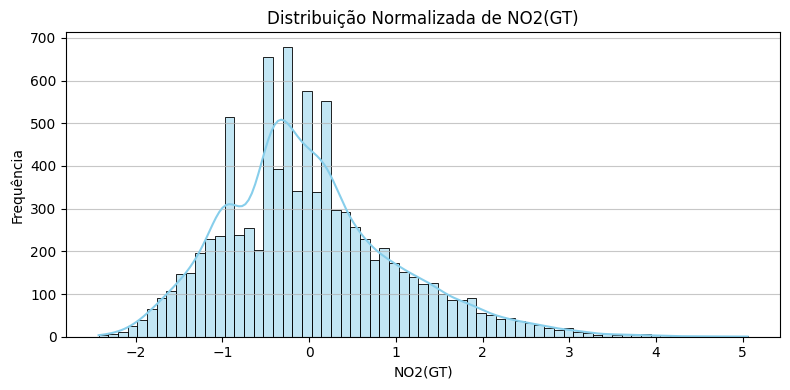

In [75]:
for var in variaveis_GT:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_padronizado[var], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição Normalizada de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

Os histogramas gerados após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

Os histogramas dos dados normalizados e padronizados apresentam distribuições muito semelhantes. Isso ocorre porque ambas as técnicas preservam a forma dos dados, alterando apenas a escala e posição. Assim, a simetria e concentração dos valores se mantêm, indicando que a escolha entre normalização e padronização depende do contexto e do modelo a ser usado.
As distribuições das três primeiras variáveis se assemelham a uma assimêtrica à direita. Já o do NO2, a distribuição se assemelha mais a normal.

# Análise com dados tratados
Agora, com os dados devidamente tratados e sem os valores substitutos (-200) que indicavam dados faltantes, serão gerados novamente boxplots e a matriz de correlação. Essa etapa permitirá visualizar de forma mais precisa a distribuição, dispersão e possíveis relações entre as variáveis, sem a interferência dos dados inconsistentes que poderiam distorcer os resultados. Assim, espera-se obter insights mais confiáveis e claros para fundamentar as próximas fases do projeto.

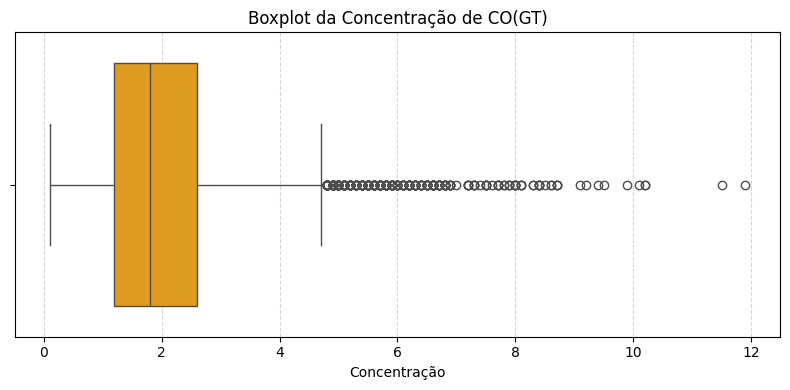

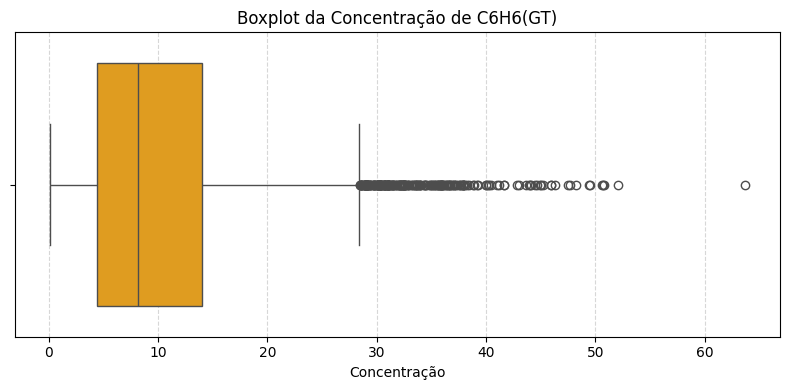

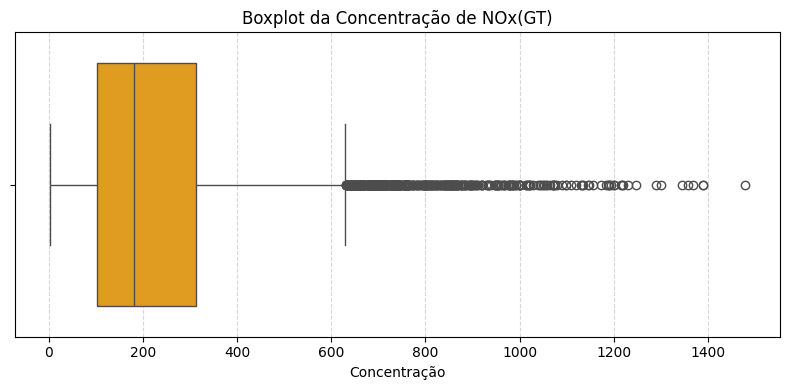

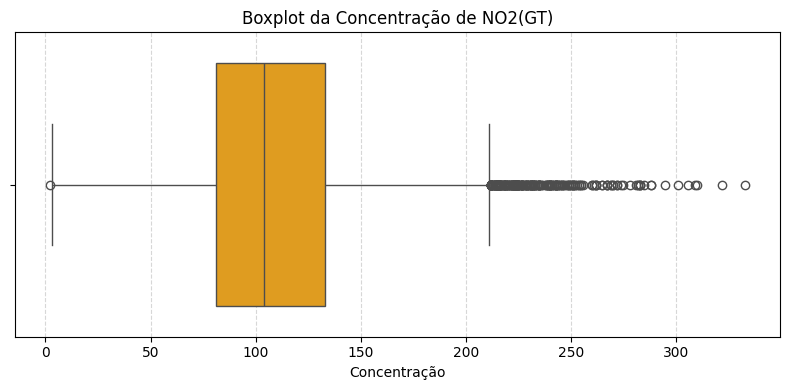

In [76]:
concentracoes_tratadas = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for poluente in concentracoes_tratadas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[poluente], color='orange')
    plt.title(f'Boxplot da Concentração de {poluente}')
    plt.xlabel('Concentração')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Os boxplots assumem visuais muito mais concisos após o tratamento. A presença de outliners ainda é grande, mas se tratando de dados atmosféricos ao longo de uma período de um ano, é esperado um variabilidade.

/tmp/ipython-input-77-702966008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


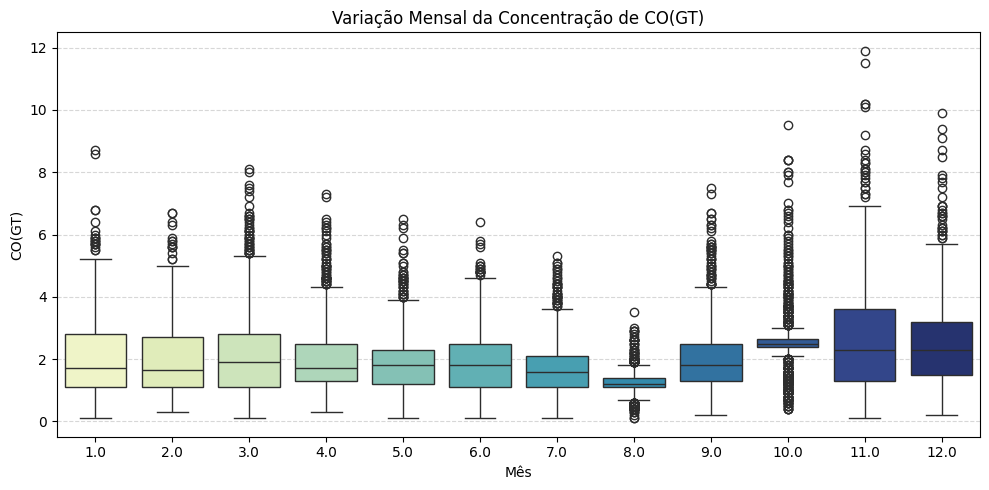

/tmp/ipython-input-77-702966008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


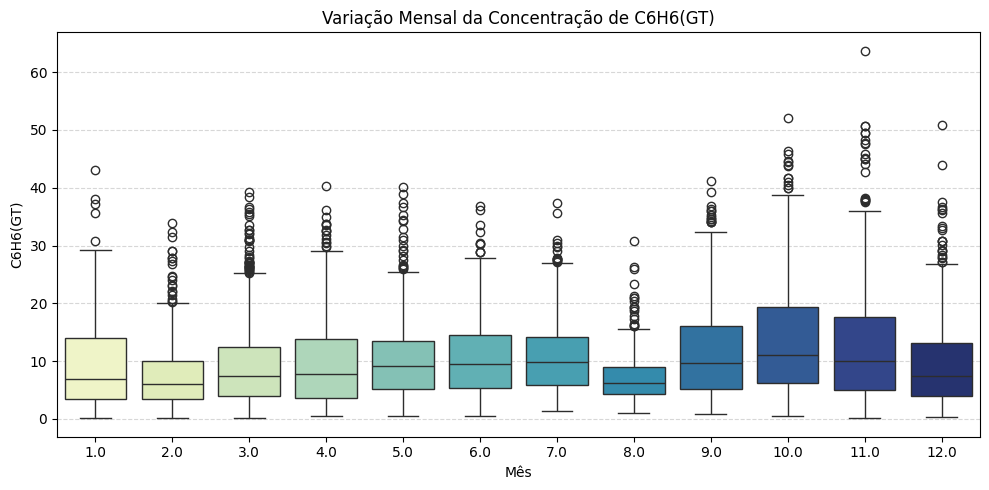

/tmp/ipython-input-77-702966008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


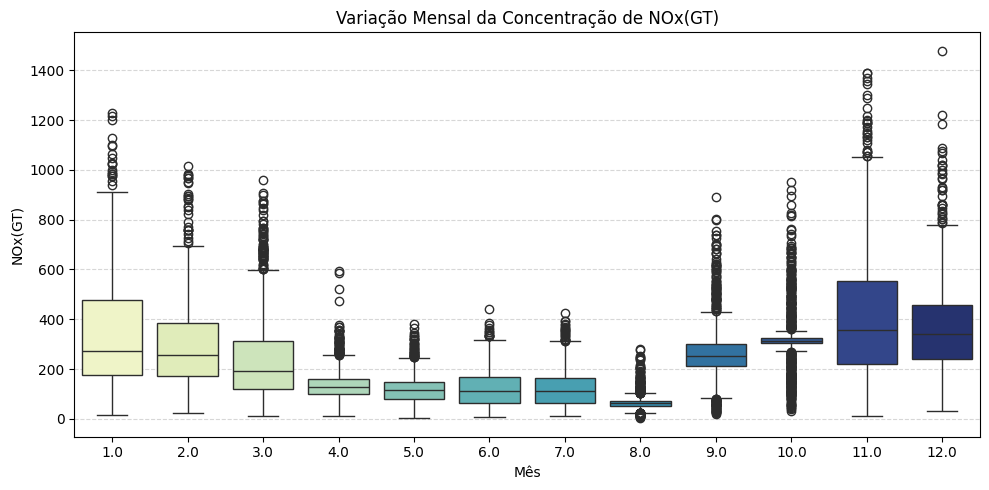

/tmp/ipython-input-77-702966008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')


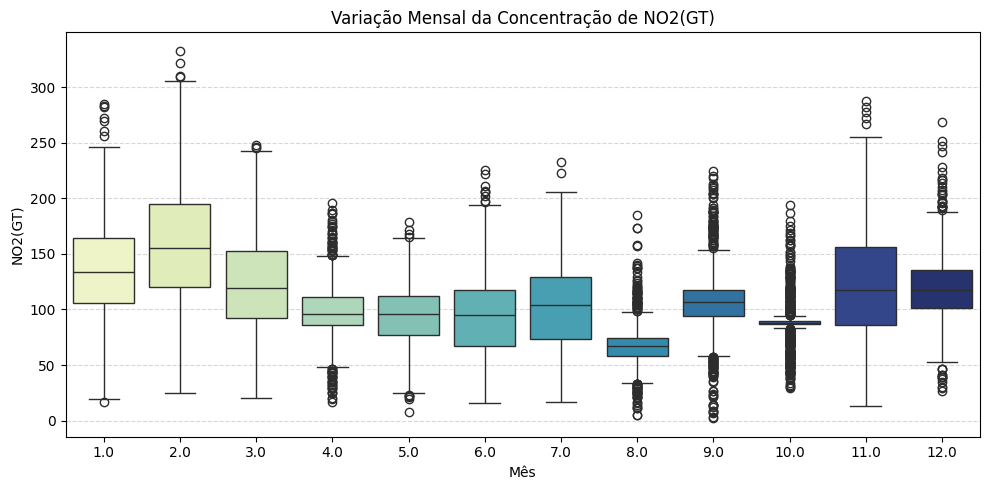

In [77]:
for var in concentracoes_tratadas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='month', y=var, data=df, palette='YlGnBu')
    plt.title(f'Variação Mensal da Concentração de {var}')
    plt.xlabel('Mês')
    plt.ylabel(f'{var}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Observando os boxplots gerados por mês, observa-se que o mês de outubro teve uma distribuição com muitos outliners para a maioria das variáveis. C6H6(GT) foi a variável com boxplots mensais com valores dentro dos quartis (Q1 e Q3) e whiskers.

In [78]:
# Matriz de correlação
df_numerico = df.select_dtypes(include=['float64'])

correlacao = df_numerico.corr()

print("\nMatriz de Correlação:")
correlacao


Matriz de Correlação:


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
CO(GT),1.000000,0.807439,0.843232,0.825632,0.767660,-0.639307,0.638563,0.556681,0.795381,-0.013044,0.062051,0.016825,0.108371
PT08.S1(CO),0.807439,1.000000,0.883795,0.892964,0.651477,-0.771938,0.585603,0.682881,0.899324,0.048627,0.114606,0.135324,-0.040345
C6H6(GT),0.843232,0.883795,1.000000,0.981950,0.648907,-0.735744,0.547866,0.765731,0.865689,0.198956,-0.061681,0.167972,0.128537
PT08.S2(NMHC),0.825632,0.892964,0.981950,1.000000,0.632864,-0.796703,0.572874,0.777254,0.880578,0.241373,-0.090380,0.186933,0.128246
NOx(GT),0.767660,0.651477,0.648907,0.632864,1.000000,-0.601916,0.748254,0.186863,0.731509,-0.278407,0.218405,-0.157622,0.154739
PT08.S3(NOx),-0.639307,-0.771938,-0.735744,-0.796703,-0.601916,1.000000,-0.578687,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017,-0.061561
NO2(GT),0.638563,0.585603,0.547866,0.572874,0.748254,-0.578687,1.000000,0.112220,0.656569,-0.215799,-0.079493,-0.357598,-0.190595
PT08.S4(NO2),0.556681,0.682881,0.765731,0.777254,0.186863,-0.538468,0.112220,1.000000,0.591144,0.561270,-0.032188,0.629641,0.176311
PT08.S5(O3),0.795381,0.899324,0.865689,0.880578,0.731509,-0.796569,0.656569,0.591144,1.000000,-0.027172,0.124956,0.070751,0.049029
T,-0.013044,0.048627,0.198956,0.241373,-0.278407,-0.145112,-0.215799,0.561270,-0.027172,1.000000,-0.578621,0.656397,0.282929


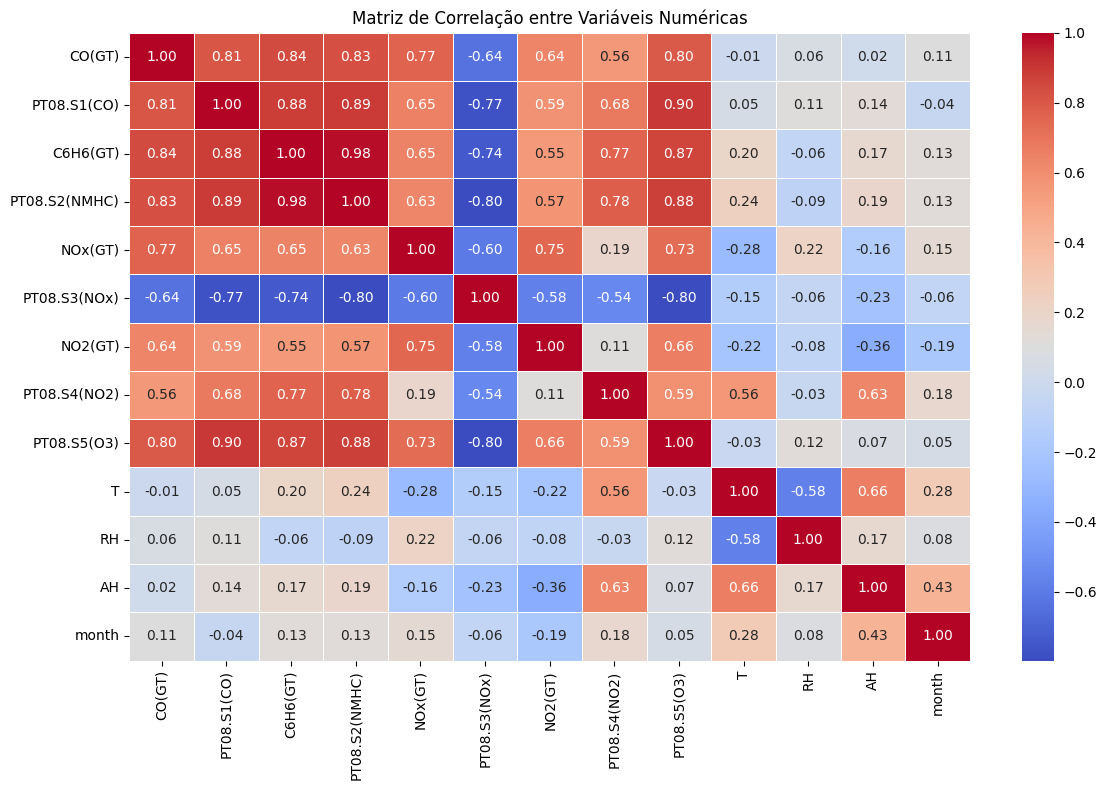

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

Após o tratamento dos dados, com a remoção de outliers representados por -200 e imputações conforme necessário, a nova matriz de correlação revela relações mais consistentes e confiáveis entre as variáveis.

Observa-se, por exemplo, correlações fortes e positivas entre:

- `C6H6(GT)` e `PT08.S2(NMHC)` (`r ≈ 0.98`), indicando que o sensor PT08.S2 está altamente sensível à presença de benzeno;
- `C6H6(GT)` e `PT08.S1(CO)` (`r ≈ 0.88`), sugerindo associação entre os poluentes ou padrões de emissão semelhantes;
- `PT08.S5(O3)` com diversos sensores, especialmente com `PT08.S1(CO)` (`r ≈ 0.90`), reforçando a captura de condições ambientais similares.

As correlações negativas entre sensores e suas respectivas variáveis medidas, como entre `PT08.S3(NOx)` e `NOx(GT)` (`r ≈ -0.60`), indicam que os sensores podem operar em escalas inversas ou que há comportamento decrescente entre a concentração e o valor de leitura do sensor.

Entre as variáveis climáticas, destacam-se:

- A correlação positiva entre `Temperatura (T)` e `AH (umidade absoluta)` (`r ≈ 0.66`), coerente com o fato de que o ar mais quente retém mais vapor d'água;
- Uma correlação mais fraca, porém positiva, entre `RH` (umidade relativa) e `AH` (`r ≈ 0.17`).

A ausência de correlações muito fortes entre clima e concentrações de poluentes sugere que essas relações podem ser não lineares ou influenciadas por múltiplos fatores simultâneos, como horário, tráfego ou características urbanas — tópicos a serem investigados nas etapas seguintes.

Essas observações tornaram-se possíveis após o tratamento adequado dos dados, eliminando distorções causadas por valores inválidos. Assim, a matriz de correlação passa a refletir com mais fidelidade os padrões reais do conjunto analisado.

# Respondendo Hipóteses

Serão feitas algumas manipulações com os dados tratados a fim de responder as hipóteses levantas no início do MVP.



### Hipótese N° 1: Concentrações de poluentes atmosféricos variam com período do dia?

/tmp/ipython-input-80-1009767550.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='periodo_dia', y=poluente, order=ordem_periodos, palette='YlOrBr')


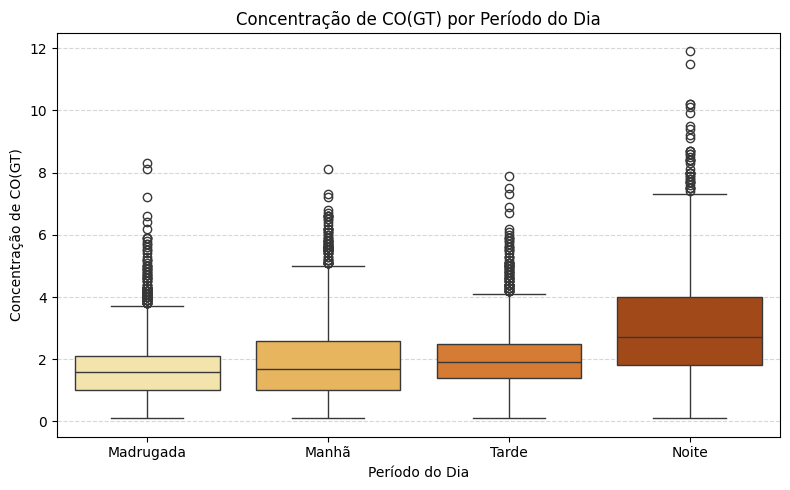

/tmp/ipython-input-80-1009767550.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='periodo_dia', y=poluente, order=ordem_periodos, palette='YlOrBr')


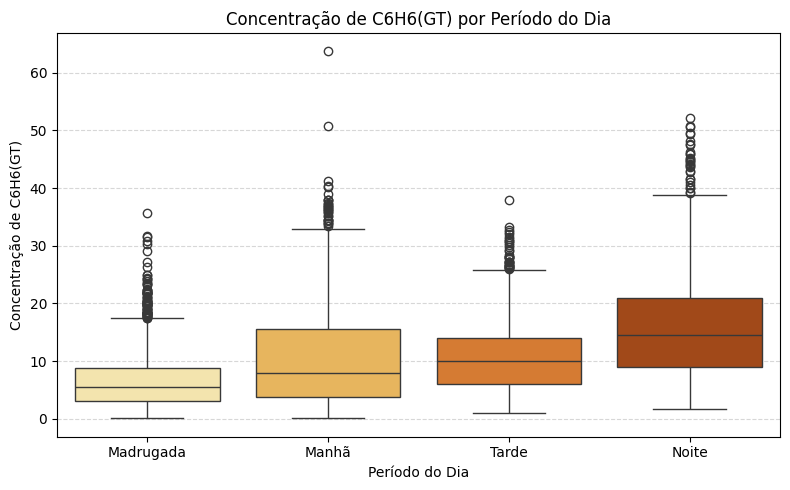

/tmp/ipython-input-80-1009767550.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='periodo_dia', y=poluente, order=ordem_periodos, palette='YlOrBr')


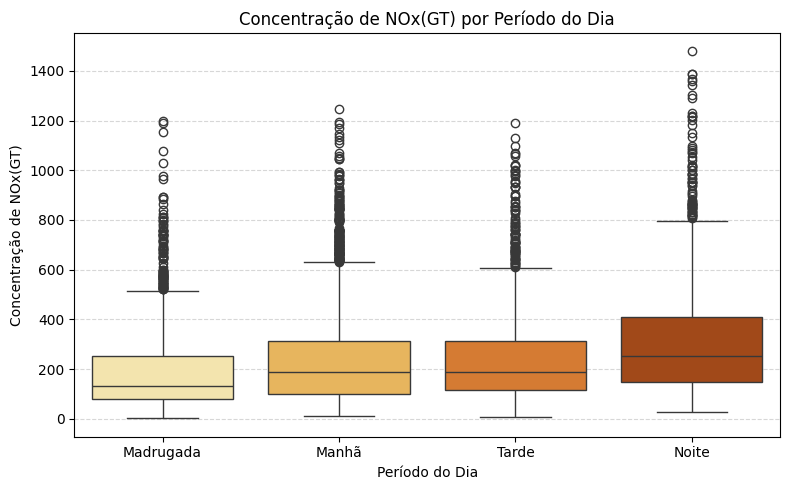

/tmp/ipython-input-80-1009767550.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='periodo_dia', y=poluente, order=ordem_periodos, palette='YlOrBr')


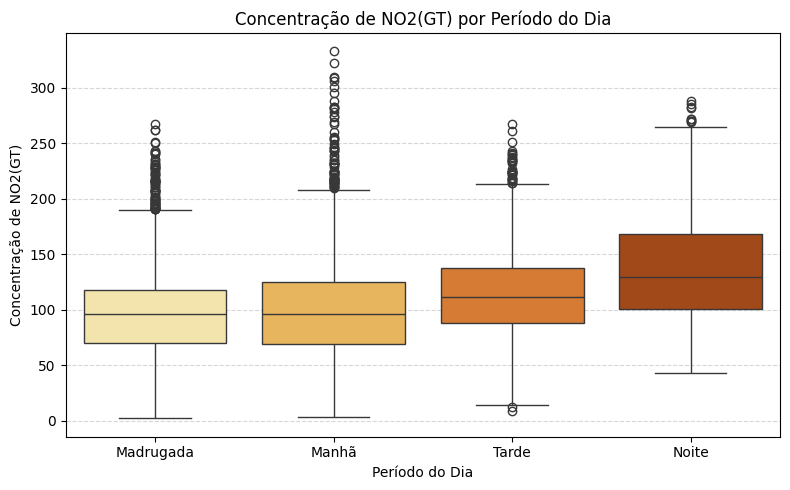

In [80]:
df['hora'] = pd.to_datetime(df['datetime']).dt.hour

def definir_periodo(hora):
    if 5 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 17:
        return 'Tarde'
    elif 17 <= hora < 21:
        return 'Noite'
    else:
        return 'Madrugada'

df['periodo_dia'] = df['hora'].apply(definir_periodo)

poluentes_gt = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
ordem_periodos = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

for poluente in poluentes_gt:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='periodo_dia', y=poluente, order=ordem_periodos, palette='YlOrBr')
    plt.title(f'Concentração de {poluente} por Período do Dia')
    plt.xlabel('Período do Dia')
    plt.ylabel(f'Concentração de {poluente}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

*   O período nortuno apresenta maior mediana em todos os poluentes.
*   Para os poluentes C6H6 e NO2, o período da manhã atingiu os maiores valores, representados pelos outliners. Os demais apresentaram a noite como o período de pico.



### Hipótese N° 2: A concentração de NO₂ (NO2(GT)) aumenta durante os horários de pico (manhã e final da tarde), sugerindo influência do tráfego urbano?


/tmp/ipython-input-81-3676491710.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='horario_pico', y='NO2(GT)', palette='coolwarm')


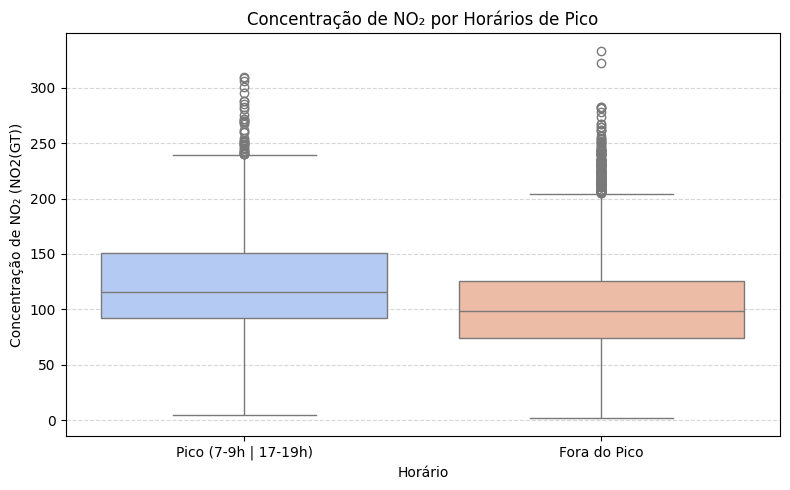

In [81]:
def classificar_pico(h):
    if 7 <= h <= 9 or 17 <= h <= 19:
        return 'Pico (7-9h | 17-19h)'
    else:
        return 'Fora do Pico'

df['horario_pico'] = df['hora'].apply(classificar_pico)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='horario_pico', y='NO2(GT)', palette='coolwarm')
plt.title('Concentração de NO₂ por Horários de Pico')
plt.xlabel('Horário')
plt.ylabel('Concentração de NO₂ (NO2(GT))')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*   Os horários de pico apresentaram uma maior concentração de NO2.


### Hipótese N° 3: Altos níveis de umidade relativa (RH) estão associados a menores concentrações de CO(GT), possivelmente devido à dispersão facilitada do gás em ambientes úmidos?


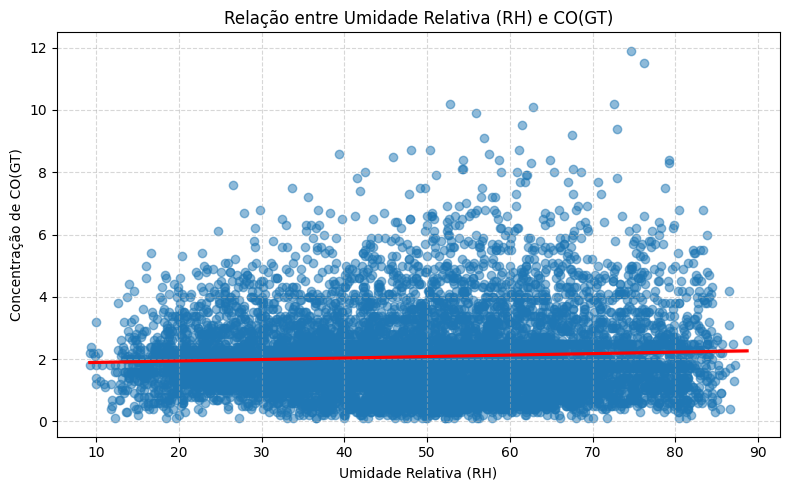

In [82]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='RH', y='CO(GT)', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relação entre Umidade Relativa (RH) e CO(GT)')
plt.xlabel('Umidade Relativa (RH)')
plt.ylabel('Concentração de CO(GT)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*   O gráfico está sem um padrão muito definido, com as variáveis espalhadas.


# Conclusão

O presente trabalho teve como objetivo a análise exploratória e o pré-processamento de um conjunto de dados ambientais, buscando compreender padrões nas concentrações de poluentes atmosféricos e suas possíveis relações com variáveis climáticas. Inicialmente, foram identificadas falhas relevantes nos dados, representadas por valores -200, que foram quantificadas e analisadas por variável e por mês. Com base nisso, decidiu-se pela exclusão da variável NMHC(GT), devido à alta taxa de falhas, e pela imputação da mediana mensal para as demais variáveis afetadas, a fim de preservar as tendências sazonais.

Na etapa seguinte, os dados foram normalizados e padronizados, permitindo a comparação entre distribuições e a geração de visualizações mais informativas, como histogramas, agora livres da interferência dos dados ausentes. As análises gráficas evidenciaram simetria e dispersão semelhantes entre as versões normalizadas e padronizadas dos dados, indicando consistência na transformação aplicada.

Com os dados tratados, a matriz de correlação foi reconstruída, revelando fortes associações entre sensores e poluentes, além de relações significativas entre algumas variáveis climáticas e de qualidade do ar. Para investigar as hipóteses traçadas inicialmente, foram elaboradas visualizações com boxplots e scatter plots, incluindo a divisão dos dados por período do dia, facilitando a análise do comportamento das concentrações ao longo do tempo.

Essas análises demonstraram que o período noturno apresentou a maior mediana de concentração para todos os poluentes analisados. No entanto, para os poluentes C6H6 e NO2, os valores mais elevados foram registrados no período da manhã, embora como outliers, enquanto os demais poluentes tiveram a noite como principal período de pico. Além disso, a análise da variável NO2(GT) confirmou que os horários de pico do tráfego apresentaram concentrações mais elevadas, corroborando a segunda hipótese. Por outro lado, a relação entre a umidade relativa (RH) e a concentração de CO(GT) não revelou um padrão claramente definido, com os pontos dispersos no gráfico de dispersão, o que limita conclusões mais precisas a partir dessa hipótese.

Por fim, as etapas de pré-processamento aplicadas neste MVP permitiram uma análise mais clara e robusta dos dados, preparando o caminho para investigações futuras mais aprofundadas ou para a modelagem preditiva em trabalhos posteriores.